# ANEOS MODEL INTERFACE JUPYTER NOTEBOOK

This Jupyter notebook provides an interface to examine an ANEOS EOS model. It is a simplified version of the notebook accompanying this paper:

<b>Stewart, S., et al. (in revision). The shock physics of giant impacts:  Key requirements for the equations of state. In J. Lane, T. Germann, and M. Armstrong (Eds.), 21st Biennial APS Conference on Shock Compression of Condensed Matter (SCCM19). AIP Publishing.</b><br>
GitHub: https://github.com/ststewart/aneos-forsterite-2019/<p>

Sarah T. Stewart <br>
sts@ucdavis.edu <br>
October 5, 2019<p>

***
***
## COMMENTS ON ANEOS FORSTERITE MODEL USED IN SPH CODE BY CANUP ET AL.

Version: Forsterite ANEOS model tabulated in Canup 2013 (developed from Benz et al. 1989). Small differences in parameters in Barr 2016.

This is a condensed phase + gas phase ANEOS model with ionization and a high-pressure phase transition for pure forsterite (Mg$_2$SiO$_4$). It uses the molecular gas feature from Melosh 2007.

Issues:<br>
  - No melt curve.<br>
  - The high-pressure phase transition was never completed in ANEOS.  It produces artificial discontinuities in the liquid field.<br>
  - There is a wedge discontinuity in the vapor field. (from the critical point adjustment parameters?)<br>
  - The 1-bar boiling temperature is very large. The vapor curve is offset from lab data at low pressures. The shape of the vapor dome is substantially different from other models.<br>
  - In the original ANEOS, the temperatures are too high and the entropies are too low in the liquid region. The discrepancy arises because the ANEOS model has a limiting 3nR heat capacity; the true heat capacities in the forsterite liquid are larger.<br>

The following plots use a tabulated version of the model EOS with a high-resolution grid. This forsterite EOS model was run using the full ANEOS code in Canup et al. 2013 rather than a tabulated grid. See the new forsterite model documentation for interpolation issues.

The different versions of ANEOS forsterite models are compared in Stewart et al. 2019.

***
***
<b>STS ANEOS INTERFACE NOTEBOOK GUIDE</b>

<b>USAGE</b><br>
This notebook interacts with multiple outputs from the Stewart-modified version of ANEOS, including phase boundary information and tabulated EOS. 

This notebook is designed to be used in two modes:<br>
<ul>
<li> Development mode: ANEOS is called in the local directory to generate new model output. The user can varying the model input parameters and tabular gridding schemes. This notebook produces plots of the equation of state surface and comparisons to experimental data and ab initio calculations.
<li> Release mode: the notebook interacts with previously created ANEOS model output. This notebook provides detailed documentation of a version-controlled release of the model EOS and enables users to interact with the EOS surface and compare the model to data. 
</ul>

This notebook is distributed in release mode. Users who wish to use the development mode may request the modified version of ANEOS from the author.<p>

Development mode:<br>
The notebook calls a local aneos executable which expects a formatted ANEOS.INPUT ascii file and an ascii gridtable.txt definition file that is generated by this notebook. ANEOS produces an ANEOS.OUTPUT ascii file and gridded ascii SESAME-format EOS tables.<br>
The user edits (1) the input parameters in ANEOS.INPUT (separately from this notebook) and (2) the output EOS table parameters in the notebook cell below.<br>
This notebook reads some parameters from ANEOS.INPUT and assumes that the variables are spaced by 10 columns.<br> 
When the notebook is run, the code issues a system call to run the aneos program in the local directory and reads in results from the ANEOS.OUTPUT, NEW-SESAME-STD.TXT, and NEW-SESAME-EXT.TXT files to make the plots below and to generate the GADGET format EOS table and other miscellaneous files.<p>

Release mode:<br>
This notebook reads in the provided ANEOS.INPUT, EOS tables, and other distribution data to generate the plots below. <p>

<b>OUTPUT/PROVIDED DATA FILES</b><br>
ANEOS.OUTPUT: Plain text file with an overview of the calculated equation of state. Look at this file for any errors in the EOS calculation.<br>

NEW-SESAME-STD.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy). 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information. <br>

NEW-SESAME-HUG.TXT: Ascii table with the reference state Hugoniot. <br>

NEW-SESAME-STD-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-GADGET2-STD-NOTENSION.TXT: Standard GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of pressure, temperature, specific internal energy, sound speed. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, dynes/cm$^2$, K, erg/g, cm/s. <br>

NEW-GADGET2-EXT-NOTENSION.TXT: Extended variables GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of Helmholtz free energy, KPA flag, MDQ flag. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, erg/g, integer flag, integer flag. <br>

The SESAME tabular equation of state formats are described in Lyon and Johnson (1992).<p>

<b>ANEOS NOTES</b><br>
The ANEOS source code was provided by Jay Melosh and Gareth Collins. This version included Melosh's (2007) treatment for molecular gas and the capability to include a melt curve and solid-solid/liquid-liquid transition (Collins & Melosh LPSC 2014).<br>
In Stewart et al. 2019, the Melosh and Collins version of ANEOS was modified to adjust the Debye model for the thermal term in the Helmholtz free energy to approach a user-defined heat capacity at high temperatures. The multiplicative factor $f_{cv}$ is entered in input value V44, and the high-temperature heat capacity is $3f_{cv}Nk$.<p>
The ANEOSTEST.f routine was modified to output tabulated EOS. Note that the current version of this function sets positive pressures smaller than 1.E-30 GPa equal to 1.E-30 GPa.<br>
ANEOS2.f was modified to increase the number of points tabulated on the melt curve in the ANEOS.OUTPUT file and to gather the variables for the heat capacity modification.<br>
ANHUG.f was modified to output more Hugoniot points.<br>
ANEOS1.f and ANEOS2.f were modified to increase the high temperature limit for the heat capacity (Stewart et al., SCCM19).<p>

<b>CORRECTIONS AND IMPROVEMENTS</b><br>
Please send corrections to STS and any requests for data to include in the model-data comparison plots.<p>

In [1]:
# this cell has a java script that that enables hiding the raw python code

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Record the verions information for these calculation for posterity
import platform
print('python version: ',platform.python_version())
del platform
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
del matplotlib
import numpy
print('numpy version: ', numpy.__version__)
del numpy
import scipy
print('scipy version: ', scipy.__version__)
del scipy
import pandas
print('pandas version: ', pandas.__version__)
del pandas

# this prevents some error messages for inline plotting in a jupyter notebook
%matplotlib inline 
# import python libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
import numpy as np
from scipy import interpolate
import colormaps as local_cmaps
import subprocess
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
#
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["patch.force_edgecolor"] = True

python version:  3.7.3
matplotlib version:  3.0.3
numpy version:  1.16.2
scipy version:  1.2.1
pandas version:  0.24.2


## USER INPUTS FOR SESAME AND GADGET2 TABLE CONSTRUCTION

If the code cell below is hidden, use the button above to reveal the cell.<p>

In development mode, the user must input:<br>
1. Header information for the SESAME table.<br>
2. Temperature, density and entropy grid points.<p>

The following code cell also includes the development mode flag and 
option to skip construction of a GADGET2 table if it is not needed.<p>

In [3]:
# -------------------------------------------------------------
# USER INPUTS
#-------------------------------------------------------------
# NOTEBOOK MODE
#-------------------------------------------------------------
#
DEVMODE = 0 # 1=development mode; 0=release mode
#
#-------------------------------------------------------------
# OPTIONS TO REMOVE TENSION REGION AND CONSTRUCT A GADGET2 TABLE
#-------------------------------------------------------------
#
REMOVETENSIONFLAG=0  # 0- keep tension region; 1- remove tension region
MAKEGADGETTABLE=0  # 1=make table; 0=do not make gadget2 table
#
#-------------------------------------------------------------
# USER MUST SET THESE VALUES TO DEFINE THE TABULATED EOS GRIDS
#-------------------------------------------------------------
#
# ====>>>>>> YOU NEED TO MAKE SURE THESE VALUES MATCH ANEOS.INPUT  <<<<=====
MODELNAME = 'Forsterite-ANEOS-SLVTv1.0G1'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 190802.     # Date as a single 6-digit number YYMMDD
VERSION = 0.1      # ANEOS Parameters Version number
FMN = 70.          # Formula weight in atomic numbers for Mg2SiO4
FMW = 140.691      # Formula molecular weight (g/cm3) for Mg2SiO4
# The following define the default initial state for material in the 201 table
R0REF   = 3.22     # g/cm3 *** R0REF is inserted into the density array
K0REF   = 1.1E12   # dynes/cm2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
# generate output files for other ANEOS models
modelflag = 1   # 0 - don't change anything above; 1 - Canup et al. 2013; 
                # 2 - GADGET2 Marcus PhD Thesis & Cuk & Stewart 2012; 3 - ISALE Dellen Collins and Melosh 2014
#
if modelflag == 1:
    MODELNAME = 'Canup2013 Forsterite'
    # Header information must all be compatible with float format
    MATID = 1.0        # MATID number
    DATE = 190802.     # Date as a single 6-digit number YYMMDD
    VERSION = 1.0      # ANEOS Parameters Version number
    FMN = 70.          # Formula weight in atomic numbers for Mg2SiO4
    FMW = 140.691      # Formula molecular weight (g/cm3) for Mg2SiO4
    # The following define the default initial state for material in the 201 table
    R0REF   = 3.32     # g/cm3 *** R0REF is inserted into the density array
    K0REF   = 1.446E12 # dynes/cm2  K0=rho0*cs0^2
    T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
    P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
if modelflag == 2:
    MODELNAME = 'GADGET2 Forsterite'
    # Header information must all be compatible with float format
    MATID = 1.0        # MATID number
    DATE = 190802.     # Date as a single 6-digit number YYMMDD
    VERSION = 1.0      # ANEOS Parameters Version number
    FMN = 70.          # Formula weight in atomic numbers for Mg2SiO4
    FMW = 140.691      # Formula molecular weight (g/cm3) for Mg2SiO4
    # The following define the default initial state for material in the 201 table
    R0REF   = 3.32     # g/cm3 *** R0REF is inserted into the density array
    K0REF   = 1.446E12 # dynes/cm2  K0=rho0*cs0^2
    T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
    P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
if modelflag == 3:
    MODELNAME = 'ISALE Forsterite'
    # Header information must all be compatible with float format
    MATID = 1.0        # MATID number
    DATE = 190802.     # Date as a single 6-digit number YYMMDD
    VERSION = 1.0      # ANEOS Parameters Version number
    FMN = 70.          # Formula weight in atomic numbers for Mg2SiO4
    FMW = 140.691      # Formula molecular weight (g/cm3) for Mg2SiO4
    # The following define the default initial state for material in the 201 table
    R0REF   = 3.227    # g/cm3 *** R0REF is inserted into the density array
    K0REF   = 1.336E12 # dynes/cm2  K0=rho0*cs0^2
    T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
    P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
#-------------------------------------------------------------
# EXAMPLE EOS GRID ARRAYS
#-------------------------------------------------------------
#
# Life is easier if the grid arrays are even in length (after adding T0REF and R0REF below)
#
# Flag for easily switching between different table grids during model development
# 0: low res for testing
# 1: high res for production: release version SLVT1.0G1
gridflag = 1
#
#------------------------------------------------------
if gridflag == 99: # low res for testing
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [30., 30.,20.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    gridrvals  = [1.e-20, 0.1, 2.6, 3.2, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [20, 10, 6, 30, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [80] # number of grid points in each segment
#
if gridflag == 0: # medium resolution grid <1E7 entries in 301 table. This is about 250,000 values.
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # 298 K is inserted into the table if it is not present in the original array
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [200.,200.,150.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.6, 3.2, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [150, 76, 54, 206, 40] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [0.,0.03] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [1] # 1 for linear, 0 for log in each segment
    gridsnpts  = [500] # number of grid points in each segment
#
if gridflag == 1: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [0, 100, 2000, 2300, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [2, 191., 100, 300.,100.,50.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.6, 3.4, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [200, 100, 160, 300, 100] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment
#----------------------------------------
# END USER INPUT
#----------------------------------------

In [4]:
# THIS CELL DEFINEs FUNCTIONS 
# define index function (must be a more efficient way to do this...)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#
# LOAD EXTERNAL FUNCTIONS AND OBJECT CLASSES
# defines rational function interpolation functions rf1d and rf2d
#%run rfinterpolation.py 
# defines class objects for extEOStable and functions to read in ANEOS input and output
# READ THIS CODE IF YOU WANT TO UNDERSTAND THE FILE STRUCTURES
%run ../eostable.py 
# Run the following help for the functions in the class
#help(extEOStable())

In [5]:
# THIS CELL HAS CODE TO GENERATE THE GRIDS AND WRITES TO A FILE TO BE READ BY ANEOS
print('GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.')
#-------------- the following code generates the temperature array
gridtarr = []
for iir in  range(1,len(gridtvals)):
    if gridtstyle[iir-1] == 1:
        # linear region
        temptarr = np.arange(gridtnpts[iir-1])/gridtnpts[iir-1]*(gridtvals[iir]-gridtvals[iir-1])+gridtvals[iir-1]
    if gridtstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridtvals[iir])-np.log10(gridtvals[iir-1]))/gridtnpts[iir-1]
        temptarr = np.power(10.,np.log10(gridtvals[iir-1])+(np.arange(gridtnpts[iir-1]))*logstep)
    gridtarr = np.concatenate((gridtarr,temptarr))
# check if T0REF already in the grid
#indexT0REF = get_indexes(T0REF,gridtarr)
indexT0REF = np.where(abs(T0REF-gridtarr)<1.E-4)[0]
if len(indexT0REF) == 0:
    # insert T0REF K into the array
    indexT0REF = np.where((gridtarr-T0REF)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexT0REF[0]],[T0REF],gridtarr[indexT0REF[0]::]))
    if indexT0REF[0]>1:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-2:indexT0REF[0]+3])
    else:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-1:indexT0REF[0]+3])
else:
    print('T0REF already in temperature array: ',T0REF,gridrarr[indexT0REF[0]-2:indexT0REF[0]+2])
# Remove 0 K or convert to 1 K
indexzero = get_indexes(0.,gridtarr)
indexone = get_indexes(1.,gridtarr)
if len(indexzero) == 1 and len(indexone) == 0:
    gridtarr[indexzero] = 1.
    print('Zero kelvin changed to 1 kelvin.')
else:
    gridtarr = np.delete(gridtarr, indexzero)
    print('Deleted zero K index.')
#
#gridtsize = len(grdtarr)
print('Number of temperature points: ',len(gridtarr))
#print(gridtarr)
#------------ the following code generates the density array
gridrarr = []
for iir in range(1,len(gridrvals)):
    if gridrstyle[iir-1] == 1:
        # linear region
        temprarr = np.arange(gridrnpts[iir-1])/gridrnpts[iir-1]*(gridrvals[iir]-gridrvals[iir-1])+gridrvals[iir-1]
    if gridrstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridrvals[iir])-np.log10(gridrvals[iir-1]))/gridrnpts[iir-1]
        temprarr = np.power(10.,np.log10(gridrvals[iir-1])+(np.arange(gridrnpts[iir-1]))*logstep)
    gridrarr = np.concatenate((gridrarr,temprarr))
# check if R0REF already in the grid
#indexR0REF = get_indexes(R0REF,gridrarr)
indexR0REF = np.where(abs(R0REF-gridrarr)<1.E-4)[0]
if len(indexR0REF) == 0:
    # insert R0REF  into the array
    indexR0REF = np.where((gridrarr-R0REF)>0.)[0]
    gridrarr = np.concatenate((gridrarr[0:indexR0REF[0]],[R0REF],gridrarr[indexR0REF[0]::]))
    print('Inserted the REFERENCE DENSITY INTO THE ARRAY:',gridrarr[indexR0REF[0]-2:indexR0REF[0]+3])
    #print('NOT INSERTING REFERENCE DENSITY INTO THE ARRAY.')
else:
    print('R0REF already in density array: ',R0REF,gridrarr[indexR0REF[0]-2:indexR0REF[0]+2])
# Remove 0 g/cm3 if present
indexzero = get_indexes(0.,gridrarr)
if len(indexzero) == 1:
    gridrarr = np.delete(gridrarr, indexzero)
    print('Deleted zero g/cm3 index.')
#
#gridrsize = len(gridrarr)
print('Number of density points: ',len(gridrarr))
#print(gridrarr)
#------------ the following code generates the specific entropy array for gadget tables
gridsarr = []
for iir in range(1,len(gridsvals)):
    if gridsstyle[iir-1] == 1:
        # linear region
        tempsarr = np.arange(gridsnpts[iir-1])/gridsnpts[iir-1]*(gridsvals[iir]-gridsvals[iir-1])+gridsvals[iir-1]
    if gridsstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridsvals[iir])-np.log10(gridsvals[iir-1]))/gridsnpts[iir-1]
        tempsarr = np.power(10.,np.log10(gridsvals[iir-1])+(np.arange(gridsnpts[iir-1]))*logstep)
    gridsarr = np.concatenate((gridsarr,tempsarr))
# Remove 0 MJ/K/kg if present
indexzero = get_indexes(0.,gridsarr)
if len(indexzero) == 1:
    gridsarr[indexzero]=1.e-20
#    gridsarr = np.delete(gridsarr, indexzero)
    print('replaced zero MJ/K/kg index with 1.E-20')
#gridssize = len(gridsarr)
#
print('Number of specific entropy points: ',len(gridsarr))
#print(gridsarr)

print('Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*3.)
#-----------------------------------------------------------
#
if DEVMODE:
    print('WRITING tablegrid.txt FOR ANEOS in the local directory.\n')
    # write the table arrays to a file for the ANEOS driver to read in
    tablegridfile = open("tablegrid.txt","w")  
    tablegridfile.write("{:.6e}".format(MATID)+'\n')  
    tablegridfile.write("{:.6e}".format(DATE)+'\n')  
    tablegridfile.write("{:.6e}".format(VERSION)+'\n')  
    tablegridfile.write("{:.6e}".format(FMN)+'\n')  
    tablegridfile.write("{:.6e}".format(FMW)+'\n')  
    tablegridfile.write("{:.6e}".format(R0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(K0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(T0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(len(gridrarr))+'\n')  # number of density points
    tablegridfile.write("{:.6e}".format(len(gridtarr))+'\n')  # number of temperature points
    for i in range(0,len(gridrarr)):
        tablegridfile.write("{:.6e}".format(gridrarr[i])+'\n')
    for i in range(0,len(gridtarr)):
        tablegridfile.write("{:.6e}".format(gridtarr[i])+'\n')
    tablegridfile.close()
#
#-----------------------------------------------------
# Output GADGET2 Table information
if MAKEGADGETTABLE:
    print('Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*8.)
#------------------------------------------------------

#----------------------------------------------------
# Sp. Internal Energy grid for Tillotson
tillearr = np.power(10.,np.arange(600)/600.*6.-3.) # MJ/kg
tillearr = np.append(0.,tillearr)
print('Number of specific internal energy points for Tillotson EOS: ',len(tillearr))
#----------------------------------------------------
# Paranoia check
# make sure all table grid values are unique
if (len(np.unique(gridtarr))!=len(gridtarr)):
    print('NON-UNIQUE VALUES IN TEMP ARRAY')
    stopthecode
if (len(np.unique(gridrarr))!=len(gridrarr)):
    print('NON-UNIQUE VALUES IN DENSITY ARRAY')
    stopthecode
if (len(np.unique(gridsarr))!=len(gridsarr)):
    print('NON-UNIQUE VALUES IN SP. ENTROPY ARRAY')
    stopthecode
if (len(np.unique(tillearr))!=len(tillearr)):
    print('NON-UNIQUE VALUES IN SP. ENERGY ARRAY')
    stopthecode

#----------------------------------------------------

print('\nDone generating EOS grids.\n')
print('\nCHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.\n')

# END TABLE GRIDDING INFORMATION

GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.
Inserted the REFERENCE TEMPERATURE INTO THE ARRAY: [279.05759162 289.0052356  298.         298.95287958 308.90052356]
Zero kelvin changed to 1 kelvin.
Number of temperature points:  744
R0REF already in density array:  3.32 [3.31  3.315 3.32  3.325]
Number of density points:  860
Number of specific entropy points:  800
Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)= 1921126.0
Number of specific internal energy points for Tillotson EOS:  601

Done generating EOS grids.


CHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.



In [6]:
if DEVMODE:
    # call aneos in the local directory
    # output file is in the local directory
    print('RUNNING IN DEVELOPMENT MODE')
    print('Calling aneos in the local directory.')
    completed = subprocess.run(['./aneos'])
    print('Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.')
    print('aneos call result: ', completed.returncode)
    print('Check ANEOS.OUTPUT file for errors.')
else:
    print('RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.')
    print('READING IN EOS DISTRIBUTION FILES.')

RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.
READING IN EOS DISTRIBUTION FILES.


In [7]:
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = extEOStable() # FIRST make new empty EOS object
NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ array
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT')
#
# calculate the principal Hugoniot from the table
if DEVMODE:
    # calculate the Hugoniot and write to a file
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,writefilename='NEW-SESAME-HUG.TXT')
else:
    # just calculate the Hugoniot and put it in the EOS object
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
#
# calculate the 1-bar profile; loop over temp
NewEOS.onebar.T = np.zeros(NewEOS.NT)
NewEOS.onebar.S = np.zeros(NewEOS.NT)
NewEOS.onebar.rho = np.zeros(NewEOS.NT)
it0 = np.where(NewEOS.T >= NewEOS.T0REF)[0]
id0 = np.arange(NewEOS.ND)#np.where(NewEOS.rho >= 0.8*NewEOS.R0REF)[0]
for iit in range(0,NewEOS.NT):
    NewEOS.onebar.T[iit] = NewEOS.T[iit]
    NewEOS.onebar.S[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.S[iit,id0])
    NewEOS.onebar.rho[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.rho[id0])
    #print(iit,NewEOS.onebar.rho[iit],NewEOS.onebar.T[iit],NewEOS.onebar.S[iit]*1.E3)


Done loading ANEOS files.
ANEOS WAS CALLED WITH THE FOLLOWING INPUT, LOADED FROM FILE  ANEOS.INPUT
 *         ANEOS INPUT FILE PARAMETERS FROM CANUP ET AL. Icarus 2013
 *         EOS#      string for EOS name           .....Hugoniot initial........ long
 *                                                 T(eV)           Rho(g/cc)     flag
 ANEOS1    -1        'CANUP2013 FORSTERITE'        THUG=-1         RHUG=-1       LONG

 *
 *         nelem     type      rho0      temp0(K)  press0    B0/-Cbulk Gamma0    Tdebye(K)
 *         V01       V02       V03       V04       V05       V06       V07       V08
 ANEOS2    3         4         3.32      298.      1.e6      -6.6E5    0.82      661.4

 *         TG model  Gamma     Esep      Tmelt(K)  ..Critical Pt..     Thermal Conduction
 *         or S1     3*C24     erg/g     or -Em    C53       C54       H0        C41
 *         V09       V10       V11       V12       V13       V14       V15       V16
 ANEOS3    0.86      2.        1.3E11    2205.

In [8]:
# Make a NOTENSION TABLE and GADGET TABLE
################### REMOVE TENSION REGION ###########################
## The GADGET2 tables do not have a tension region. 
## If the gadget2 table is selected, then must generate a no-tension table
if MAKEGADGETTABLE:
    REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region

# minimum pressure 1.E-30
# minimum sp energy about 1.E-4 before negative entropy region
# minimum sp entropy about 1.E-5 before negative entropy region
# minimum HFE about 1.E-3 before negative entropy region
# minimum sound speed about 1.E-10 before negative entropy region
# minimum sp heat capacity about 1.E-4 before negative entropy region

## FUTURE WORK: THIS SECTION COULD USE THE LEVER RULE TO FILL IN THE MISSING POINTS
## SINCE MANY VALUES ARE NEAR THE LOWER LIMITS IN THE SUBLIMATION REGION ANYWAY, 
## HERE, TENSION REGION VALUES ARE FILLED IN WITH THE ADJACENT S-V DOME VALUES
## This is obviously bad for interpolations. Fix for future work.
if REMOVETENSIONFLAG:
    # First make a deep copy of the original table with the tension region
    NewEOSorig = deepcopy(NewEOS)
    NewEOS.MODELNAME = NewEOS.MODELNAME+'notension'
    # THIS SECTION REWRITES NEGATIVE PRESSURE REGION
    # The tension region is in the solid-vapor phase boundary. 
    # Use the liquid-vapor phase boundary. Below the temperature of the triple point, it is the sublimation curve.
    # But the pressures for the solid calculation is spurious at very low pressures, so use the vapor pressure.
    # HFE = GFE + TS
    print('REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.')
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.P[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, len(badind), NewEOS.T[itt], 'tension only', NewEOS.P[itt,badind[0]-4:badind[0]+1])
                # at this temperature, all densities are the same pressure in the vapor dome
                # so use the adjacent positive pressure value
                # do the same for all the variables since there is very little change in this region of the dome.
                # Errors introduced by interpolating the vapor curve are comparable to
                # recalculating the lever rule. Would need to call ANEOS again to get good end point values
                # to calculate the mass-weighted value via the lever rule.
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1])
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                NewEOS.KPA[itt,badind] = np.full(len(badind),2)
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-1) # replaced tension region flag
            else:
                print('SOMETHING VERY WRONG WITH TENSION IN THE TABLE')
                makethecodestop # please tell me a more graceful way to stop the notebook
    #
    # THIS SECTION RESETS NEGATIVE SPECIFIC ENTROPIES WITH ADJACENT VALUES OR MINIMUM POSITIVE VALUES
    # THESE VALUES TYPICALLY DEFINE THE COLD COMPRESSION LIMIT OF THE MATERIAL
    # OR SPURIOUS NEGATIVE ENTROPIES AT VERY LOW PRESSURES (IMPERFECT DEBYE MODEL IN ANEOS)
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.S[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, antarr[itt], andarr[badind[0]], badind[0],len(badind),'negative entropy', ansarr[itt,badind[0]],ansarr[itt,badind[0]-1])
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1]) # use the adjacent pressure at this temperature in the dome
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                #NewEOS.KPA[itt,badind]  # leave as original region flag
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag
                #print('Some NEGATIVE  S AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt],NewEOS.P[itt,badind[0]-1],NewEOS.P[itt,badind[0]-2]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
            if badind[0] == 0:
                print('All S VALUES NEGATIVE AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
                NewEOS.S[itt,badind] = np.full(len(badind),1.E-10)            
                NewEOS.U[itt,badind] = np.full(len(badind),1.E-10) # also replace the negative sp. internal energies           
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag

    #### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, HFE
        NewEOS.writestdsesame(writestdsesfname="NEW-SESAME-STD-NOTENSION.TXT")

#### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
#if DEVMODE:
    #### WRITE MDQ Flag as a 301-style table
    #NewEOS.writemdqsesame(writemdqsesfname="NEW-SESAME-MDQ.TXT")
#
#--------------------------------------------------------------------------
########## MAKE GADGET2 EOS TABLE ARRAYS ###################
# LATER WE CAN TURN THIS INTO A FUNCTION IN THE GADGET EOS OBJECT
# FLAG IS SET ABOVE IN THE USER INPUT SECTION
# MAKEGADGETTABLE = 1 # 1 - do it ; 0 - skip it
if MAKEGADGETTABLE:
    print('Starting interpolation for GADGET table.')
    GadEOS  = extGADtable() # make new empty Gadget EOS object
    #
    # rho array is andarr to match the SESAME table
    # S array is gridsarr
    GadEOS.ND  = len(gridrarr)
    GadEOS.NS  = len(gridsarr)
    GadEOS.rho = gridrarr
    GadEOS.S   = gridsarr
    GadEOS.P   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.T   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.U   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.A   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cs  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cv  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.KPA = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MDQ = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-linear-int'
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, apply minimum values
    gadpmin  = np.min(NewEOS.P) # GPa
    gadsmin  = 1.E-30     # MJ/K/kg
    gademin  = np.min(NewEOS.U)    # MJ/kg
    gadtmin  = 1.     # K
    gadcmin  = np.min(NewEOS.cs) # cm/s
    gadcvmin = 0.     # MJ/K/kg
    gadamin  = np.min(NewEOS.A) # can be negative    # MJ/kg
    print('Minimum values used in the rational function interpolation scheme:')
    print('gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=')
    print(gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin)
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, fill the region with the adjacent real values from the original T-RHO table
    # ----------------------------------------------------------
    # SIMPLE LINEAR INTERPOLATION TO FLIP T-RHO to S-RHO table
    print("LINEAR INTERPOLATION FOR GADGET TABLE.")
    for iid in range(0,GadEOS.ND):
        # same density arrays for the T-rho table and S-rho table
        sall1d = NewEOS.S[:,iid]
        pall1d = NewEOS.P[:,iid]
        eall1d = NewEOS.U[:,iid]
        tall1d = NewEOS.T[:]
        call1d = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d = NewEOS.A[:,iid]
        kall1d = NewEOS.KPA[:,iid]
        mdqall1d = NewEOS.MDQ[:,iid]
        # interpolate P at the new S
        testinterp = interpolate.interp1d(sall1d,pall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = pall1d[NewEOS.NT-1]
        # interpolate E at the new S
        testinterp = interpolate.interp1d(sall1d,eall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = eall1d[NewEOS.NT-1]
        # interpolate T at the new S
        testinterp = interpolate.interp1d(sall1d,tall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = tall1d[NewEOS.NT-1]
        # interpolate sound speed at the new S
        testinterp = interpolate.interp1d(sall1d,call1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate sp. heat capacity at the new S
        testinterp = interpolate.interp1d(sall1d,cvall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate HFE at the new S
        testinterp = interpolate.interp1d(sall1d,aall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate phase information KPA flag at the new S
        testinterp = interpolate.interp1d(sall1d,kall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate model development quality flag at the new S
        testinterp = interpolate.interp1d(sall1d,mdqall1d)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = call1d[NewEOS.NT-1]
    #
    GadEOSlin = deepcopy(GadEOS)
    #
    '''
    # ----------------------------------------------------------
    # 1D RATIONAL FUNCTION INTERPOLATION METHOD FROM KERLEY
    print("RATIONAL FUNCTION INTERPOLATION TO GENERATE GADGET2 EOS TABLE.")
    for iid in range(0,GadEOS.ND):
        GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-ratfunc-int'
        #
        # same density arrays for the T-rho table and S-rho table
        sall1d  = NewEOS.S[:,iid]
        pall1d  = NewEOS.P[:,iid]
        eall1d  = NewEOS.U[:,iid]
        tall1d  = NewEOS.T[:]
        call1d  = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d  = NewEOS.A[:,iid]
        #kall1d = NewEOS.KPA[:,iid]
        #mdqall1d = NewEOS.MDQ[:,iid]
        #
        # interpolate P at the new S
        GadEOS.P[:,iid] = rf1d(sall1d,pall1d,gridsarr,gadpmin)
        # interpolate E at the new S
        GadEOS.U[:,iid] = rf1d(sall1d,eall1d,gridsarr,gademin)
        # interpolate T at the new S
        GadEOS.T[:,iid] = rf1d(sall1d,tall1d,gridsarr,gadtmin)
        # interpolate sound speed at the new S
        GadEOS.cs[:,iid] = rf1d(sall1d,call1d,gridsarr,gadcmin)
        # interpolate sp. heat capacity at the new S
        GadEOS.cv[:,iid] = rf1d(sall1d,cvall1d,gridsarr,gadcvmin)
        # interpolate HFE at the new S
        GadEOS.A[:,iid] = rf1d(sall1d,aall1d,gridsarr,gadamin)
        # Do not interpolate KPA or MDQ with rational function interp. Use Linear.
        # do not overwrite the linear interpolation above.
    '''
    #
    print('Done interpolating the gadget2 table.')
    #print('Using RATIONAL FUNCTION INTERPOLATION EXCEPT FOR KPA and MDQ FLAGS (bilinear).')
    if DEVMODE:
        # ONLY WRITE GADGET2 TABLE TO DISK IN DEVELOPMENT MODE
        #### WRITE NEW GADGET2 TABLE WITH NO TENSION REGION
        #### This ascii table format follows the sesame table format of 5 columns of numbers in 16.8e format
        #### the STYLE variable is just a counter to 5 to know when to write a newline
        GadEOS.writestdgadget(writestdgadgetfname="NEW-GADGET-STD-NOTENSION.TXT")
        GadEOS.writeextgadget(writeextgadgetfname="NEW-GADGET-EXT-NOTENSION.TXT")


In [9]:
# READ IN FORSTERITE MATERIAL DATA SETS
datadir='../data/'
#======================================================================
#======================================================================
# Gather some experimental and theoretical data on forsterite

FoSTP_S = 0.6689E-3 # MJ/K/kg STP is 0.6689 kJ/K/kg (Robie et al. 1982)

# Read in 1 bar data for forsterite from Gillet et al. 1991
#T_solid (K), S_solid (J/K/kg), T_melt (K), S_melt (J/K/kg) 
# **** Melt is calculated sp. entropy based on constant Cv from Thomas et al. 2013 ****
Gilletfile=datadir+'Gillet-1991-Forsterite_Entropy_to_3000K.txt'
Gilletdatarr = pd.read_csv(Gilletfile,skiprows=1)

# Read in data thief'd melt curve for forsterite from Mosenfelder et al. 2007
# P GPa and T K
# Asimow acknowledges that this is not a well constrained curve May 2019
Mosenfelderfile=datadir+'Mosenfelder-2007-melt-curve.txt'
Mosenfelderdatarr = pd.read_csv(Mosenfelderfile,skiprows=1)

# Gruneisen parameter for liquid forsterite from Z release data 
# Erik J. Davies, et al., 2019, IN PREPARATION FOR PUBLICATION
# Gamma, G_e, Density, rho_e , q, q_e rho in kg/m3
fileZdata=datadir+'Davies-2019-Gamma_Release_Data_20190812.txt'
#Load in Shallow Release Densities and Gammas
SR_rho=np.loadtxt(fileZdata,delimiter=',',skiprows=1,usecols=[2])/1.e3 # g/cm3
SR_rho_e=np.loadtxt(fileZdata,delimiter=',',skiprows=1,usecols=[3])/1.e3 # g/cm3
SR_gamma=np.loadtxt(fileZdata,delimiter=',',skiprows=1,usecols=[0])
SR_gamma_e=np.loadtxt(fileZdata,delimiter=',',skiprows=1,usecols=[1])

# Root et al. 2018, QMD Hugoniot including specific heat capacities calculated by Townsend
fileQMDHUGdata=datadir+'Root-2018-Forsterite-QMD-Hugoniot.txt'
# QMD values with no near-STP point (skip 3)
QMDH_r1=np.loadtxt(fileQMDHUGdata,skiprows=3,usecols=[0]) # g/cm3
QMDH_cv=np.loadtxt(fileQMDHUGdata,skiprows=3,usecols=[5])/1.e3 # MJ/K/kg
QMDH_grun=np.loadtxt(fileQMDHUGdata,skiprows=3,usecols=[4]) # Gruneisen Parameter
QMDH_up=np.loadtxt(fileQMDHUGdata,skiprows=3,usecols=[6]) # km/s 
QMDH_us=np.loadtxt(fileQMDHUGdata,skiprows=3,usecols=[7]) # km/s
# QMD Hugoniot Points with near-STP point (skip 2)
QMDH_r=np.loadtxt(fileQMDHUGdata,skiprows=2,usecols=[0]) # g/cm3
QMDH_e=np.loadtxt(fileQMDHUGdata,skiprows=2,usecols=[1]) # MJ/kg
QMDH_p=np.loadtxt(fileQMDHUGdata,skiprows=2,usecols=[2]) # GPa
QMDH_t=np.loadtxt(fileQMDHUGdata,skiprows=2,usecols=[3]) # K

# Root et al. 2018 Z Machine All PV Hugoniot data points
zhugoniotfile = open(datadir+"Root-2018-ForsteriteHugoniotData-03Nov2017.txt","r")  # SESAME units
Zdat_all=np.loadtxt(zhugoniotfile,skiprows=2,usecols=[4,5,6,7,8,9,10,11]) 
zhugoniotfile.close()
Zdat_up=Zdat_all[:,0]# km/s
Zdat_uperr=Zdat_all[:,1] # km/s
Zdat_us=Zdat_all[:,2] # km/s
Zdat_userr=Zdat_all[:,3] # km/s
Zdat_r=Zdat_all[:,4] # g/cm3
Zdat_rerr=Zdat_all[:,5] # g/cm3
Zdat_p=Zdat_all[:,6] # GPa
Zdat_perr=Zdat_all[:,7] # GPa

# Root et al. 2018 Z Machine All PVT Hugoniot data points
# One point corrected; one point added in Davies et al. 2019
#P (Gpa),Pe,T (K),Te,Us (km/s),Use,Up,Upe,Flyer V
zhugoniotfile = open(datadir+"Root-2018-Davies-2019-Forsterite_PT_hugDat.csv","r")  # SESAME units
ZTdat_all=np.loadtxt(zhugoniotfile,skiprows=3,usecols=[0,1,2,3,4,5,6,7],delimiter=',') 
zhugoniotfile.close()
ZTdat_p=ZTdat_all[:,0] # GPa
ZTdat_perr=ZTdat_all[:,1] # GPa
ZTdat_t=ZTdat_all[:,2] # K
ZTdat_terr=ZTdat_all[:,3] # K
ZTdat_us=ZTdat_all[:,4] # km/s
ZTdat_userr=ZTdat_all[:,5] # km/s
ZTdat_up=ZTdat_all[:,6]# km/s
ZTdat_uperr=ZTdat_all[:,7] # km/s
#ZTdat_r= # g/cm3
#ZTdat_rerr= # g/cm3

# Root et al. 2018 FITTED WITH PROPAGATED ERRORS PVT Hugoniot with Sp. Entropies from Davies et al. 2019
#P (Pa), T (K), S (J/K/kg), rho (kg/m^3), Pe, Te, Se, rho_e  
zhugoniotfile = open(datadir+"Davies-2019-Z_Hugoniot-20190922.txt","r")  # mks
zhugfitarr = pd.read_csv(zhugoniotfile,skiprows=1) 
zhugoniotfile.close()
Zfit_r0 = 3.22 # g/cm3
Zfit_p = zhugfitarr.iloc[:,0].values/1.E9 # GPa
Zfit_perr = zhugfitarr.iloc[:,4].values/1.E9 # GPa
Zfit_t = zhugfitarr.iloc[:,1].values # K
Zfit_terr = zhugfitarr.iloc[:,5].values # K
Zfit_s = zhugfitarr.iloc[:,2].values/1.E6 # MJ/K/kg
Zfit_serr = zhugfitarr.iloc[:,6].values/1.E6 # MJ/K/kg
Zfit_r = zhugfitarr.iloc[:,3].values/1.E3 # g/cm3
Zfit_rerr = zhugfitarr.iloc[:,7].values/1.E3 # g/cm3
Zfit_up = np.sqrt((Zfit_p)*(1./Zfit_r0-1./Zfit_r)) # km/s
Zfit_us = (1./Zfit_r0)*np.sqrt((Zfit_p)/(1./Zfit_r0-1./Zfit_r)) # km/s

# Davies et al. 2019
# Entropy tie point ('point E') on the Fo principal Hugoniot
Ztie_p=237. # GPa
Ztie_perr=83. # GPa
Ztie_s=4036.E-6 # MJ/K/kg
Ztie_serr=212.E-6 # MJ/K/kg


# Root et al. 2018 OMEGA decaying shock temperature data
#OMEGA Livermore data 77780
OM_rhoD=3277 #Need for livermore data, kg/m^3
OM_rhoDe=OM_rhoD*0.003
fname=datadir+'Root-2018-s77775_withP.txt'
OM_DU1=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[0])
OM_DUe1=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[1])
OM_DR1=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[4])
OM_DRe1=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[5])
OM_DT1=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[2])
OM_DTe1=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[3])
OM_D1P=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[6])
OM_D1Pe=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[7])
fname=datadir+'Root-2018-s77776_withP.txt'
OM_DU2=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[0])
OM_DUe2=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[1])
OM_DR2=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[4])
OM_DRe2=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[5])
OM_DT2=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[2])
OM_DTe2=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[3])
OM_D2P=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[6])
OM_D2Pe=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[7])
fname=datadir+'Root-2018-s77779_withP.txt'
OM_DU3=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[0])
OM_DUe3=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[1])
OM_DR3=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[4])
OM_DRe3=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[5])
OM_DT3=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[2])
OM_DTe3=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[3])
OM_D3P=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[6])
OM_D3Pe=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[7])
fname=datadir+'Root-2018-s77780_withP.txt'
OM_DU4=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[0])
OM_DUe4=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[1])
OM_DR4=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[4])
OM_DRe4=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[5])
OM_DT4=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[2])
OM_DTe4=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[3])
OM_D4P=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[6])
OM_D4Pe=np.loadtxt(fname,delimiter=',',skiprows=1,usecols=[7])


# low pressure gas gun Hugoniot data datathiefed from Mosenfelder et al. 2007
lowhugoniotfile = open(datadir+"Mosenfelder-2007-forsterite-hugoniot.txt","r")  # density g/cm3, pressure GPa
lowhugdatarr = pd.read_csv(lowhugoniotfile,skiprows=1)
lowhugoniotfile.close() 
LowHugDat_r0 = 3.22 # g/cm3
LowHugDat_r = lowhugdatarr.iloc[:,0].values # g/cm3
LowHugDat_p = lowhugdatarr.iloc[:,1].values # GPa
LowHugDat_up = np.sqrt((LowHugDat_p)*(1./LowHugDat_r0-1./LowHugDat_r)) # km/s
LowHugDat_us = (1./LowHugDat_r0)*np.sqrt((LowHugDat_p)/(1./LowHugDat_r0-1./LowHugDat_r)) # km/s
#print(LowHugDat_up)
#print(LowHugDat_us)


# Fiquet et al 2010 Peridotite solidus and liquidus
# P GPa, T K
peridotitefile = open(datadir+"Fiquet-2010-Science-Peridotite-Melting-Fig3-solidus.txt","r")  
peridotitesolidusdatarr = pd.read_csv(peridotitefile,skiprows=1)
peridotitefile.close() 
peridotitefile = open(datadir+"Fiquet-2010-Science-Peridotite-Melting-Fig3-liquidus.txt","r")  
peridotiteliquidusdatarr = pd.read_csv(peridotitefile,skiprows=1)
peridotitefile.close() 

# Thomas & Asimow 2013 Forsterite Liquid shock data BAD TABULATED VALUES
#foliqhugpres = [0.,9.21,22.98,47.6,75.0,96.7,114.3] 
#foliqhugdens = [2.273,3.34,3.74,4.1,4.29,4.68,4.68] # Tabulated incorrect values
# recalculate the TA13 Hugoniot Points 
# May 2019: Confirmed with Asimow that the tabulated values are incorrect and recalculation values are correct
# He says incorrect values only in the published tables; Correct values used in the thermodynamic analysis.
foliqrho0 = 2597. # kg/m3
foliqup = np.asarray([1.644,0.886,4.08,2.59,3.41,4.43]) # km/s
foliqus = np.asarray([5.38,4.,9.14,7.1,8.47,9.95]) # km/s
foliqup = foliqup*1000. # m/s
foliqus = foliqus*1000. # m/s
foliqp = foliqrho0*foliqup*foliqus # Pa calculate correct liquid Hugoniot values
foliqv = (1./foliqrho0)*(1.-foliqup/foliqus) # m3/kg calculate correct liquid Hugoniot values
foliqrho = 1./foliqv # kg/m3
# convert to SESAME units
foliq_r = foliqrho/1.E3 # g/cm3
foliq_r0 = foliqrho0/1.E3 # g/cm3
foliq_up = foliqup/1.E3 # km/s
foliq_us = foliqus/1.E3 # km/s
foliq_p = foliqp/1.E9 # GPa
foliq_t0 = 2273. # K



## Color mesh plots of the SESAME Rho-T table


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


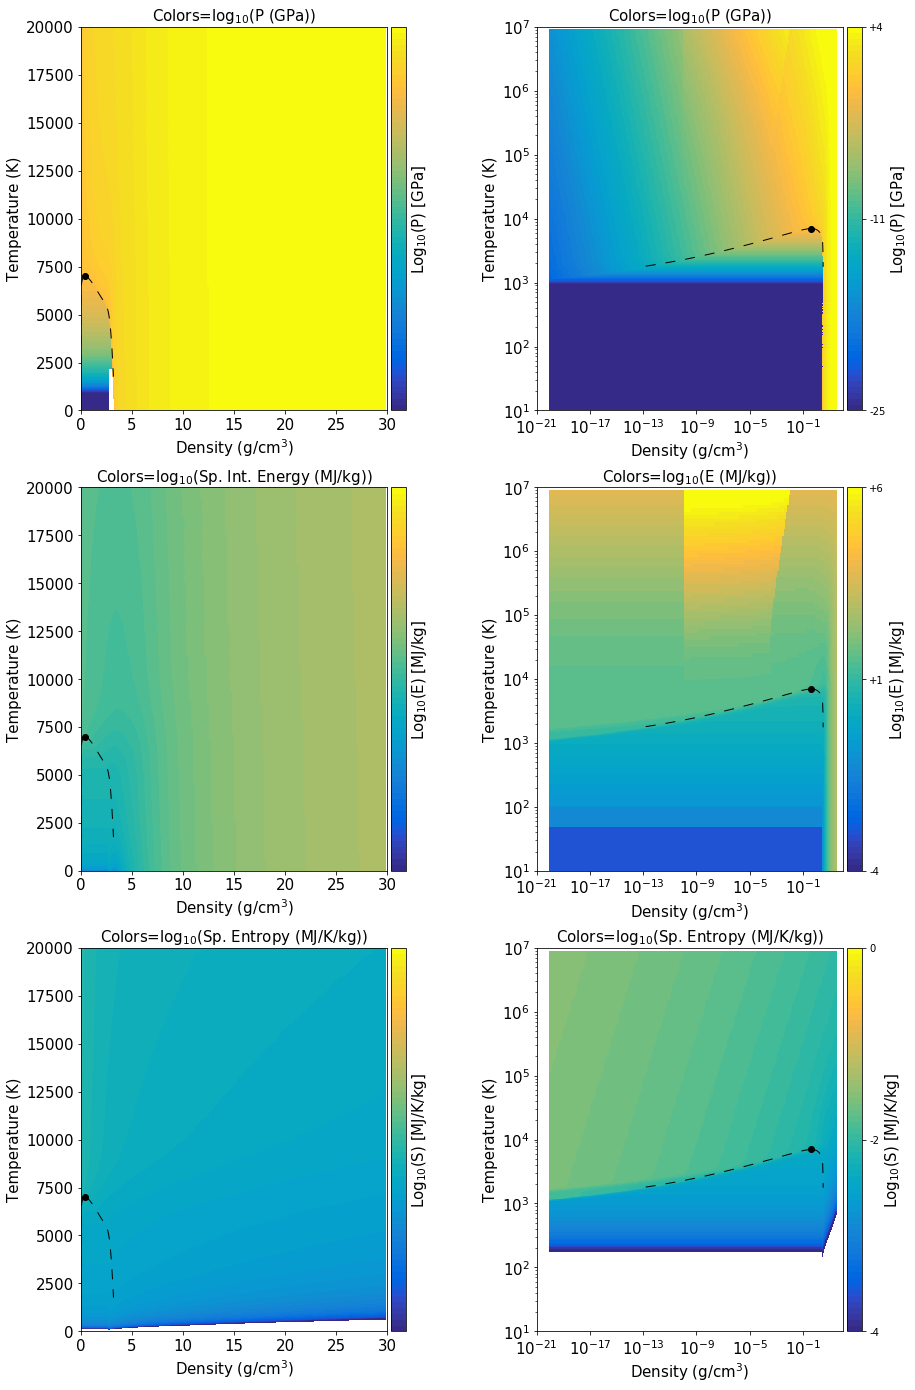

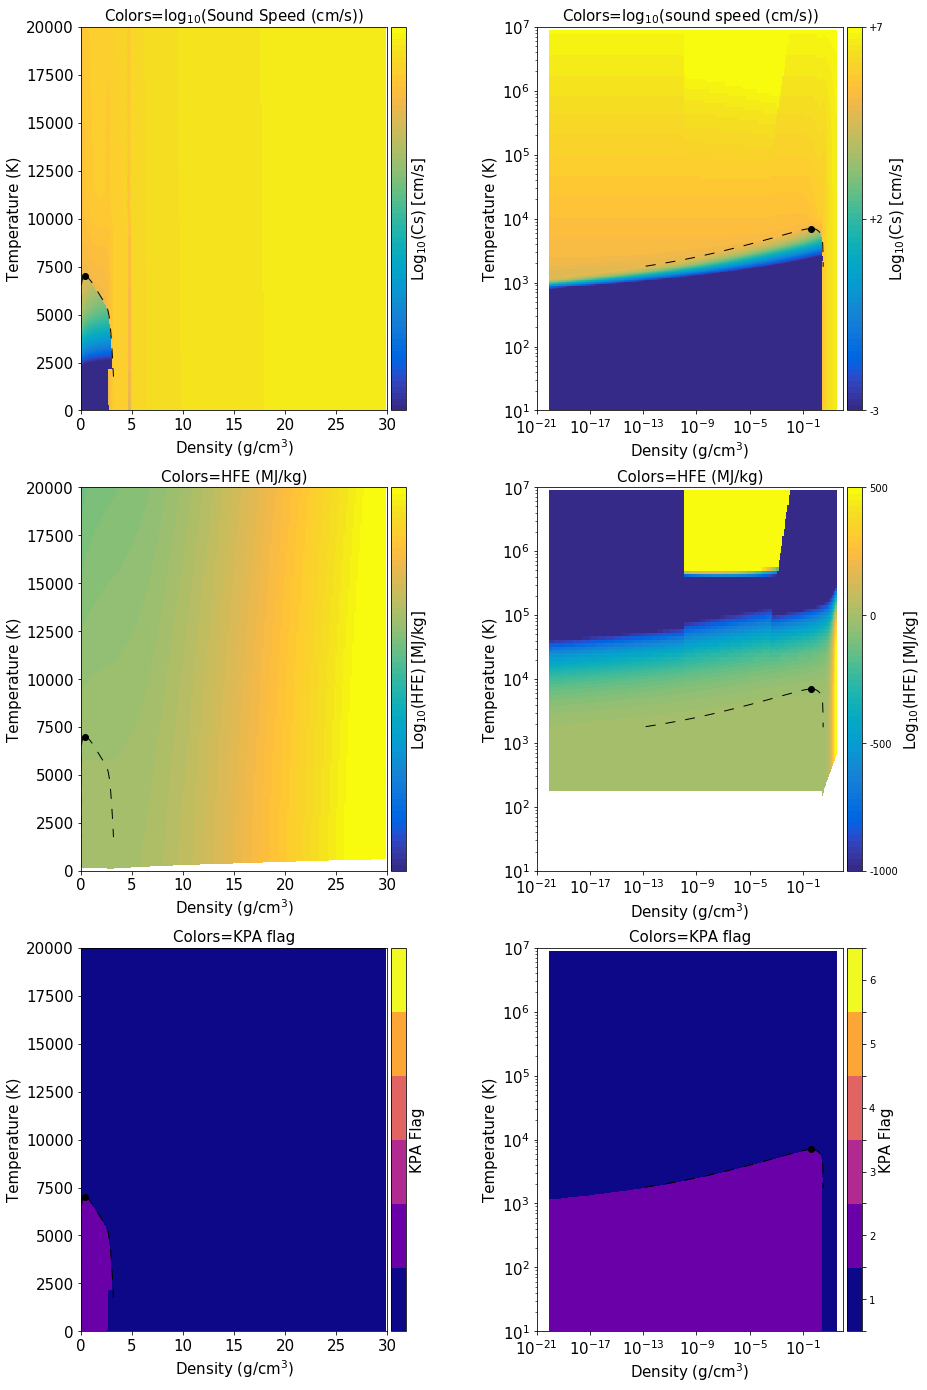

In [10]:
# PLOT COLOR SHADED VALUES RHO-T TABLE
lw=1
sfont = 15
ds = (10,10)

%matplotlib inline
fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)
#plt.tight_layout(pad=0.6)

##================ Pressure
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
#cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
#cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)


#================ Sp. Int. Energy
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
# does not want to label ticks in this location
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','',''])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)
#cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

#================ Sp. Entropy
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-4', '-2', '0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '-2','0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


##============= start new plot
fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#================ Sound Speed
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,20000)
ax0.set_xlim(0,30.)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(10.,1.E7)
ax1.set_xlim(1.E-21,100.)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


#================ HFE
amin = np.min(NewEOS.A)
amin = -1000.
alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
#print('amin, log10(amin)',amin,np.log10(-amin))
#print('alogmax=',alogmax)
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,20000)
ax2.set_xlim(0,30.)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(10.,1.E7)
ax3.set_xlim(1.E-21,100.)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



#================ KPA flag
cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors

im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA))/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,20000)
ax4.set_xlim(0,30.)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=KPA flag',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(10.,1.E7)
ax5.set_xlim(1.E-21,100.)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=KPA flag',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


fig2.show()



## ANEOS Hugoniot Compared to Experimental Data

The following plots compare the ANEOS model Hugoniots with laboratory data and ab initio calculations. Shock Hugoniot data points from gas gun experiments are summarized in Figure 1 of Mosenfelder et al. 2007. High pressure Hugoniot points obtained by the Z machine and QMD calculations are from Root et al. 2018.

Entropy on the Hugoniot derived by Davies et al., 2019, using the Z Hugoniot, Z-derived Gruneisen parameters, and thermodynamic integration.

Orange points are corrected data points for the liquid (rho=2.661 g/cm$^3$, T$_0$=2273 K) forsterite Hugoniot from Thomas and Asimow 2013. 

ANEOS STP Hugoniots: red -- calculated in the ANEOS code; blue -- calculated by linear interpolation of the EOS table.


Requested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):
Initial Pressure (GPa): -0.0032021
Initial Temperature (K): 298.0
Initial Sp. Entropy (MJ/K/kg): 0.00064309
Initial Sp. Internal Energy (MJ/kg): 0.36678
Initial Density (g/cm3): 3.32


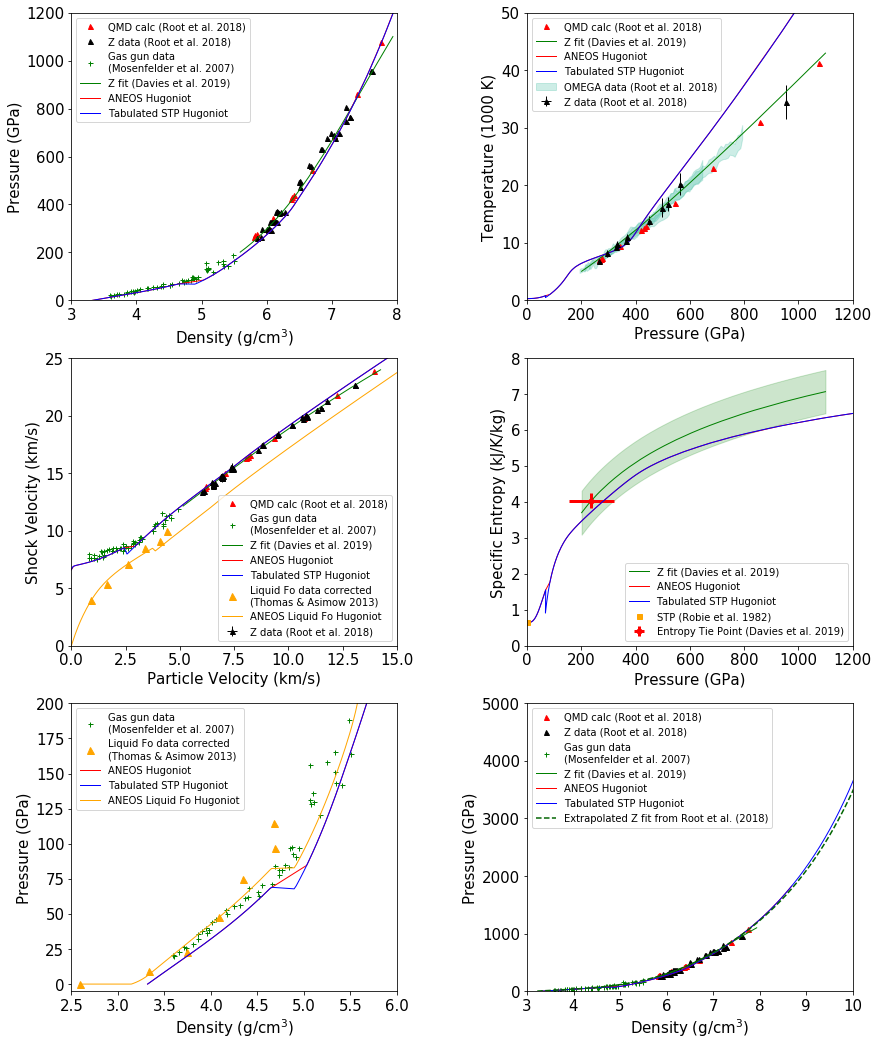

In [11]:
# Display the initial conditions for the Hugoniot in ANEOS.OUTPUT    
print('\nRequested ANEOS Hugoniot initial state from (THUG,RHUG) (red curves in plots below):')
print('Initial Pressure (GPa):',NewEOS.anhug.P[0])
print('Initial Temperature (K):',NewEOS.anhug.T[0])
print('Initial Sp. Entropy (MJ/K/kg):',NewEOS.anhug.S[0])
print('Initial Sp. Internal Energy (MJ/kg):',NewEOS.anhug.U[0])
print('Initial Density (g/cm3):',NewEOS.anhug.rho[0])
#

#========== PLOTTING STYLES FOR LOTS OF PLOTS =================
styleqmd = ['^','red',5,'QMD calc (Root et al. 2018)']
stylezdat = ['^','black',5,'Z data (Root et al. 2018)']
stylegg = ['+','green',5,'Gas gun data\n(Mosenfelder et al. 2007)']
styleliq = ['^','orange',7,'Liquid Fo data corrected\n(Thomas & Asimow 2013)']
styleliqhug = ['-','orange',1,'ANEOS Liquid Fo Hugoniot']
stylezfit = ['-','green',1,'Z fit (Davies et al. 2019)']
styleanhug = ['-','red',1,'ANEOS Hugoniot']
stylestphug = ['-','blue',1,'Tabulated STP Hugoniot']
styleanphase = ['-','black',1,'ANEOS Phase Boundaries']
stylephasept = ['o','black',6]



#======================LOTS OF PLOTS============================
# plot the Hugoniots for comparison
sfont = 15
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,18))
plt.subplots_adjust(wspace=0.4)

#-------------
# Pressure-Density Data vs. ANEOS
ai=0
aj=0
axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
axes[ai,aj].plot(Zdat_r,Zdat_p,stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
axes[ai,aj].plot(LowHugDat_r,LowHugDat_p,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(Zfit_r,Zfit_p,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])

axes[ai,aj].set_ylim(0,1200)
axes[ai,aj].set_xlim(3.,8.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure - Temperature Data vs. ANEOS
ai=0
aj=1

#####OMEGA data from Root et al. 2018
col=local_cmaps.parula(0.5)
axes[ai,aj].fill_between(OM_D1P*1000,(OM_DT1-OM_DTe1)/1000,(OM_DT1+OM_DTe1)/1000,label="OMEGA data (Root et al. 2018)",
         color=col,alpha=0.25)
axes[ai,aj].fill_between(OM_D2P*1000,(OM_DT2-OM_DTe2)/1000,(OM_DT2+OM_DTe2)/1000,
         color=col,alpha=0.25)
axes[ai,aj].fill_between(OM_D3P*1000,(OM_DT3-OM_DTe3)/1000,(OM_DT3+OM_DTe3)/1000,
         color=col,alpha=0.25)
axes[ai,aj].fill_between(OM_D4P*1000,(OM_DT4-OM_DTe4)/1000,(OM_DT4+OM_DTe4)/1000,
         color=col,alpha=0.25)

axes[ai,aj].plot(QMDH_p[1::],QMDH_t[1::]/1.E3,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
axes[ai,aj].errorbar(ZTdat_p,ZTdat_t/1.E3,xerr=ZTdat_perr,yerr=ZTdat_terr/1.E3,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3],elinewidth=1)
axes[ai,aj].plot(Zfit_p,Zfit_t/1.E3,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.T/1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T/1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])

axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylim(0,50)
axes[ai,aj].set_ylabel('Temperature (1000 K)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Particle Velocity vs. Shock Velocity; Data vs. ANEOS
ai=1
aj=0

axes[ai,aj].plot(QMDH_up[1::],QMDH_us[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
axes[ai,aj].errorbar(Zdat_up,Zdat_us,xerr=Zdat_uperr,yerr=Zdat_userr,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3],elinewidth=1)
axes[ai,aj].plot(LowHugDat_up,LowHugDat_us,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(Zfit_up,Zfit_us,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.up,NewEOS.anhug.us,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])

axes[ai,aj].plot(foliq_up,foliq_us,styleliq[0],markersize=styleliq[2],color=styleliq[1],label=styleliq[3])
# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=foliq_r0,t0=foliq_t0)
axes[ai,aj].plot(NewEOS.hug.up,NewEOS.hug.us,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_ylim(0,25)
axes[ai,aj].set_xlabel('Particle Velocity (km/s)',size=sfont)
axes[ai,aj].set_ylabel('Shock Velocity (km/s)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Sp. Entropy vs Pressure; Calculated from experiments vs. ANEOS
ai=1
aj=1

axes[ai,aj].plot(Zfit_p,Zfit_s*1.E3,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].fill_between(Zfit_p,(Zfit_s-Zfit_serr)*1000.,(Zfit_s+Zfit_serr)*1000.,color=stylezfit[1],alpha=0.2)
# pressure error envelope is tiny and can't be seen on this scale
#axes[ai,aj].fill_betweenx(Zfit_s*1000.,(Zfit_p-Zfit_perr),(Zfit_p+Zfit_perr),color='red',alpha=0.2)
axes[ai,aj].plot(NewEOS.anhug.P,NewEOS.anhug.S*1.E3,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.S*1.E3,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
# Tie point from Davies et al. 2019
axes[ai,aj].errorbar(Ztie_p,Ztie_s*1.E3,xerr=Ztie_perr,yerr=Ztie_serr*1.E3,fmt='o',markersize=5,color='red',label='Entropy Tie Point (Davies et al. 2019)',elinewidth=3)
# Fo at STP from Robie et al. 1982
axes[ai,aj].plot(1.E-4,FoSTP_S*1.E3,'s',markersize=5,color='orange',label='STP (Robie et al. 1982)')


axes[ai,aj].set_ylim(0,8.)
axes[ai,aj].set_xlim(0,1200)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   LOW PRESSURE + LIQUID HUGONIOT
ai=2
aj=0
#axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
#axes[ai,aj].plot(Zdat_r,Zdat_p,stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
axes[ai,aj].plot(LowHugDat_r,LowHugDat_p,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
# Liquid forsterite Hugoniot Data
axes[ai,aj].plot(foliq_r,foliq_p,styleliq[0],markersize=styleliq[2],color=styleliq[1],label=styleliq[3])
axes[ai,aj].plot(foliq_r0,0,styleliq[0],markersize=styleliq[2],color=styleliq[1])
#axes[ai,aj].plot(Zfit_r,Zfit_p,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
# ANEOS REFERENCE POINT (STP) Hugoniots
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
# ANEOS LIQUID HUGONIOT
# Calculate the model Hugoniot with the same initial state as Thomas & Asimow 2013
NewEOS.calchugoniot(r0=foliq_r0,t0=foliq_t0)
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,styleliqhug[0],linewidth=styleliqhug[2],color=styleliqhug[1],label=styleliqhug[3])
# Put the STP hugoniot back into the structure
NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)

axes[ai,aj].set_ylim(-5,200)
axes[ai,aj].set_xlim(2.5,6.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)

#-------------
# Pressure-Density Data vs. ANEOS   EXTRAPOLATED HIGH PRESSURE
ai=2
aj=1
axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
axes[ai,aj].plot(Zdat_r,Zdat_p,stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
axes[ai,aj].plot(LowHugDat_r,LowHugDat_p,stylegg[0],markersize=stylegg[2],color=stylegg[1],label=stylegg[3])
axes[ai,aj].plot(Zfit_r,Zfit_p,stylezfit[0],linewidth=stylezfit[2],color=stylezfit[1],label=stylezfit[3])
axes[ai,aj].plot(NewEOS.anhug.rho,NewEOS.anhug.P,styleanhug[0],linewidth=styleanhug[2],color=styleanhug[1],label=styleanhug[3])
axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])

# Extrapolate the exponential form Hugoniot from Root et al. 2018
uptmp = NewEOS.hug.up #up in km/s
ustmp = 6.89+1.22*uptmp-1.50*uptmp*np.exp(-0.4*uptmp) # root 2018 exponential fit 
ptmp = 3220*uptmp*ustmp/1.e3 # GPa
vtmp = (1./3220)*(1.-uptmp/ustmp)
axes[ai,aj].plot(1/vtmp/1.e3,ptmp,'--',color='darkgreen',label='Extrapolated Z fit from Root et al. (2018)')

axes[ai,aj].set_ylim(0,5000)
axes[ai,aj].set_xlim(3.,10.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].legend(fontsize=sfont-5)




## Model Critical Point and Shock-Induced Phase Changes

See Davies et al. 2019 for experimentally constrained criteria for impact-vaporization of forsterite.<br>
See Townsend et al. 2019 for ab initio calculation of the critical point of forsterite.

In [12]:
print('ANEOS Calculated Critical point:')
print('   Temperature (K):       ',NewEOS.cp.T)
print('   Pressure (GPa):        ', NewEOS.cp.P)
print('   Density (g/cm^3):      ',NewEOS.cp.rho)
print('   Sp. Energy (MJ/kg):    ', NewEOS.cp.U)
print('   Sp. Entropy (kJ/K/kg): ', NewEOS.cp.S*1.e3)
print('\n')
print('ANEOS Calculated Values at 1 bar:')
print('   Temperature at melting (K):                     ', NewEOS.onebar.Tmelt)
print('   Liquid density at melting (g/cm^3):             ', NewEOS.onebar.rhocm)
print('   Sp. Entropy at inc. melting Sim (kJ/K/kg):      ', NewEOS.onebar.Sim*1.E3)
print('   Sp. Entropy at com. melting Scm (kJ/K/kg):      ', NewEOS.onebar.Scm*1.E3)
print('   Temperature at boiling (K):                     ', NewEOS.onebar.Tvap)
print('   Liquid density at boiling (g/cm^3):             ', NewEOS.onebar.rhoiv)
print('   Sp. Entropy at inc. vaporization Siv (kJ/K/kg): ', NewEOS.onebar.Siv*1.E3)
print('   Sp. Entropy at com. vaporization Scv (kJ/K/kg): ', NewEOS.onebar.Scv*1.E3)
print('\n')
if NewEOS.tp.T > 0:
    print('ANEOS Calculated Triple Point:')
    print('   Temperature (K):                        ',NewEOS.tp.T)
    print('   Pressure (GPa):                         ', NewEOS.tp.P)
    print('   Solid density (g/cm^3):                 ',NewEOS.tp.rhos)
    print('   Liquid density (g/cm^3):                ',NewEOS.tp.rhol)
    print('   Vapor density (g/cm^3):                 ',NewEOS.tp.rhov)
    print('   Sp. Entropy at inc. melt Sim (kJ/K/kg): ', NewEOS.tp.Sim*1.E3)
    print('   Sp. Entropy at com. melt Scm (kJ/K/kg): ', NewEOS.tp.Scm*1.E3)
    print('   Sp. Entropy at inc. vap. Siv (kJ/K/kg): ', NewEOS.tp.Siv*1.E3)
    print('   Sp. Entropy at com. vap. Scv (kJ/K/kg): ', NewEOS.tp.Scv*1.E3)
else:
    print('ANEOS: No melt curve or triple point in this calculation.')
print('\n')
print('Starting at reference conditions (rho,T): ',NewEOS.R0REF,NewEOS.T0REF, ' (g/cm^3, K)')
print('ANEOS model conditions for shock-induced vaporization on release to 1 bar:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.onebar.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Siv+0.5*(NewEOS.onebar.Scv-NewEOS.onebar.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.onebar.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))
print('ANEOS model conditions for shock-induced vaporization on release to the triple point pressure:')
print('                     :         IM        CM        IV      50%V        CV')
print('Shock Pressure (GPa) : {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.P),
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.P)))
print('Imp. Match Vel (km/s): {:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
    np.interp(NewEOS.tp.Sim,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scm,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv,NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Siv+0.5*(NewEOS.tp.Scv-NewEOS.tp.Siv),NewEOS.hug.S,NewEOS.hug.up)*2,
    np.interp(NewEOS.tp.Scv,NewEOS.hug.S,NewEOS.hug.up)*2))


ANEOS Calculated Critical point:
   Temperature (K):        6996.55
   Pressure (GPa):         0.188012
   Density (g/cm^3):       0.41533600000000004
   Sp. Energy (MJ/kg):     20.4653
   Sp. Entropy (kJ/K/kg):  5.93009


ANEOS Calculated Values at 1 bar:
   Temperature at melting (K):                      0.0
   Liquid density at melting (g/cm^3):              0.0
   Sp. Entropy at inc. melting Sim (kJ/K/kg):       0.0
   Sp. Entropy at com. melting Scm (kJ/K/kg):       0.0
   Temperature at boiling (K):                      4457.67
   Liquid density at boiling (g/cm^3):              2.8675100000000002
   Sp. Entropy at inc. vaporization Siv (kJ/K/kg):  3.29037
   Sp. Entropy at com. vaporization Scv (kJ/K/kg):  8.948290000000002


ANEOS: No melt curve or triple point in this calculation.


Starting at reference conditions (rho,T):  3.32 298.0  (g/cm^3, K)
ANEOS model conditions for shock-induced vaporization on release to 1 bar:
                     :         IM        CM        IV 

## Model Phase Boundaries

Black lines are the ANEOS phase boundaries. Blue curve is the interpolated Hugoniot from the gridded eos table.

Comparison critical points from experimentally constrained quartz critical point (Kraus et al. 2012), ab initio enstatite critical point (Xiao & Stixrude 2018).

Mosenfelder et al. 2007 present an estimate of the melt curve of forsterite at high pressures. For planetary applications, a forsterite EOS is often used to represent the whole mantle. For comparison, the peridotite solidus and liquidus from Fiquet et al. 2010 are shown. The estimates for the mantle solidus and liquidus span a very large range, especially when water is included; see Figure 1 in Andrault et al. 2017.

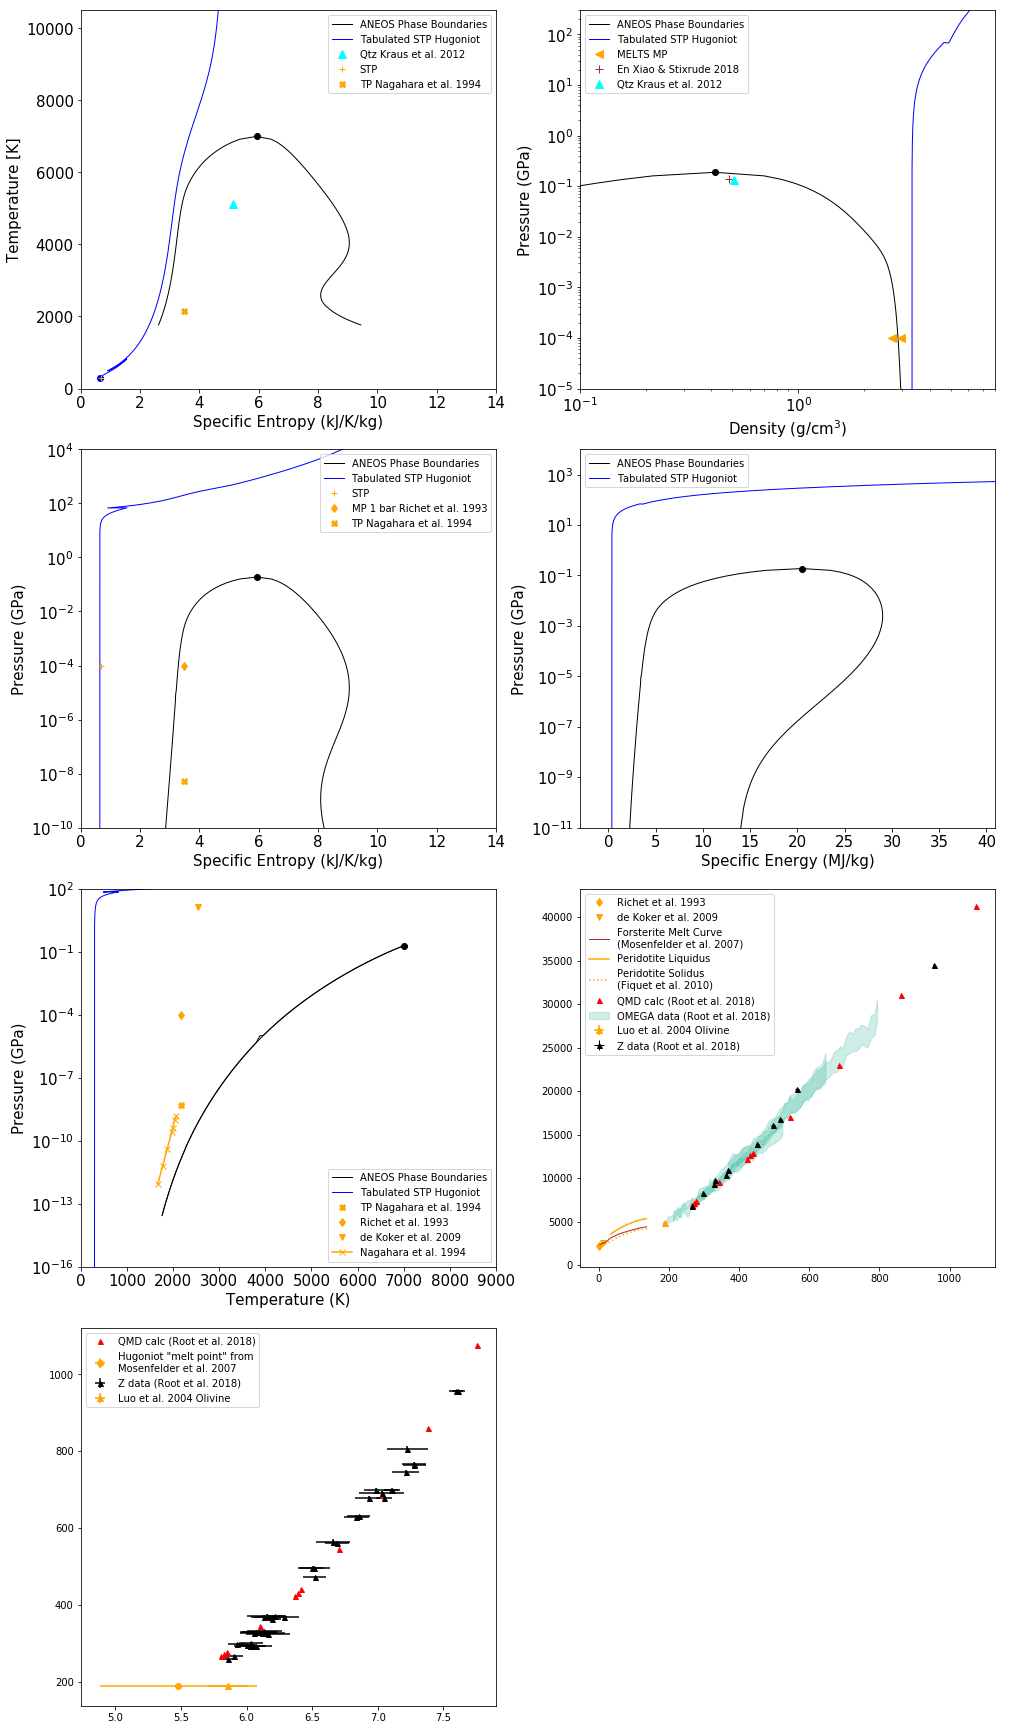

In [13]:
# PHASE DIAGRAM PLOTS
#======================LOTS OF PLOTS============================
# Plot aneos phase boundaries with focus on the vapor curve
sfont = 15
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#------------------------------
# entropy-temperature
ai=0
aj=0
axes[ai,aj].plot(NewEOS.vc.Sl*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.T[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(0,1.5*NewEOS.cp.T)
axes[ai,aj].set_xlim(0,14)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------------------
# density-pressure
ai=0
aj=1
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_ylim(1.e-5,300)
axes[ai,aj].set_xlim(1.e-1,8)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
#entropy-pressure
ai=1
aj=0
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.E3,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Sv*1.E3,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.S*1.E3,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.E3,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Ss*1.E3,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.S*1.E3,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.S[0]*1.E3,NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-10,10000)
axes[ai,aj].set_xlim(0,14)

#-----------
# specific energy - pressure
ai=1
aj=1
axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.U,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.U[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1.e-11,10000)
axes[ai,aj].set_xlim(-3,NewEOS.cp.U*2.)

#-------
# temperature - pressure
ai=2
aj=0
axes[ai,aj].semilogy(NewEOS.vc.T,NewEOS.vc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
axes[ai,aj].plot(NewEOS.vc.T,NewEOS.vc.Pv,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
axes[ai,aj].plot(NewEOS.cp.T,NewEOS.cp.P,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
    axes[ai,aj].plot(NewEOS.mc.T,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

axes[ai,aj].plot(NewEOS.hug.T,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
axes[ai,aj].plot(NewEOS.hug.T[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_xlim(0,9000)
axes[ai,aj].set_ylim(1.e-16,100)

#-------
# pressure - temperature melt curve
ai=2
aj=1
#axes[ai,aj].plot(NewEOS.vc.Pl,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
#axes[ai,aj].plot(NewEOS.vc.Pv,NewEOS.vc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])
#axes[ai,aj].plot(NewEOS.cp.P,NewEOS.cp.T,'o',color=stylephasept[1],markersize=stylephasept[2])
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Pl,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.Ps,NewEOS.mc.T,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

    axes[ai,aj].plot(NewEOS.hug.P,NewEOS.hug.T,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
    axes[ai,aj].plot(NewEOS.hug.P[0],NewEOS.hug.T[0],'o',color=stylestphug[1])

    axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
    axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
    axes[ai,aj].tick_params(labelsize=sfont)
    axes[ai,aj].set_ylim(0,9000)
    axes[ai,aj].set_xlim(-5,450)

#-------
# density - pressure melt curve
ai=3
aj=0
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2],label=styleanphase[3])
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,styleanphase[0],color=styleanphase[1],linewidth=styleanphase[2])

    axes[ai,aj].plot(NewEOS.hug.rho,NewEOS.hug.P,stylestphug[0],linewidth=stylestphug[2],color=stylestphug[1],label=stylestphug[3])
    axes[ai,aj].plot(NewEOS.hug.rho[0],NewEOS.hug.P[0],'o',color=stylestphug[1])

    axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
    axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
    axes[ai,aj].tick_params(labelsize=sfont)
    axes[ai,aj].set_ylim(100,300)
    axes[ai,aj].set_xlim(4.5,6.5)

#===================================================================
# PLOT EXPERIMENTAL CONSTRAINTS ON THE ANEOS PHASE BOUNDARIES
PLOTDATA=1
datms = 8
if PLOTDATA:
    # entropy-temperature [0,0]
    ai=0
    aj=0
    axes[ai,aj].plot(5.149,5130,'^',markersize=datms,color='cyan',label='Qtz Kraus et al. 2012')
    # 0.6689 kJ/kg STP entropy from Robie et al. 1982
    axes[ai,aj].plot(0.669,298,'+',color='orange',label='STP')
    # 1 bar melting point entropy, enthalpy and temperature from Richet et al. 1993
    #axes[ai,aj].plot(3.470,2174,'d',color='orange',label='MP 1 bar Richet et al. 1993')
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(3.470,2163,'X',color='orange',label='TP Nagahara et al. 1994')


    # density-pressure [0,1]
    ai=0
    aj=1
    axes[ai,aj].plot([2.687,2.9468],[1.E-4,1.E-4],'<',markersize=datms,color='orange',label='MELTS MP') # Berman solid, Lange liquid
    axes[ai,aj].plot(0.4822,0.1414,'+',label='En Xiao & Stixrude 2018',markersize=datms,color='brown')
    axes[ai,aj].plot(0.508,0.132,'^',label='Qtz Kraus et al. 2012',markersize=datms,color='cyan')

    # entropy -- pressure [1,0]
    ai=1
    aj=0
    # 0.6689 kJ/kg STP entropy from Robie et al. 1982
    axes[ai,aj].plot(0.669,1.e-4,'+',color='orange',label='STP')
    # 1 bar melting point entropy, enthalpy and temperature from Richet et al. 1993
    axes[ai,aj].plot(3.470,1.e-4,'d',color='orange',label='MP 1 bar Richet et al. 1993')
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(3.470,5.2e-9,'X',color='orange',label='TP Nagahara et al. 1994')

    # temperature -- pressure [2,0]
    ai=2
    aj=0
    # Triple point from Nagahara et al. 1994
    #Triple point of forsterite 5.2e-5 bar, 1890 C (2163 K)
    axes[ai,aj].plot(2163.,5.2e-9,'X',color='orange',label='TP Nagahara et al. 1994')
    # Melt curve points
    axes[ai,aj].plot(2174,1.e-4,'d',color='orange',label='Richet et al. 1993')
    axes[ai,aj].plot(2550,13.,'v',color='orange',label='de Koker et al. 2009')
    # Nagahara et al. 1994 vapor curve of forsterite
    tvapfo = np.arange(46)*10.+1400.+273. # in C to K
    #pvapfo = np.exp(-77955.0/tvapfo+27.7)
    pvapfonagahara = np.exp(169.-543.e3/(8.314*(tvapfo))) 
    #print(pvapfonagahara)
    #print(tvapfo)
    #print(pvapfo)
    #axes[3,0].plot(tvapfo+273.,pvapfo*1.e5/1.e9,linestyle='-',color='orange',label='Sublimation curve\nMysen & Kushiro 1988')
    #axes[3,0].plot(tvapfo,pvapfonagahara*1.e5/1.e9,linestyle='-',color='green',label='Sublimation curve\nNagahara et al. 1994')
    #print(pvapfonagahara)
    tt=np.zeros(7)
    tt.fill(273.)
    tt=tt+np.asarray([1400.,1500.,1600.,1700.,1725.,1760.,1800.])
    axes[ai,aj].plot(tt,np.asarray([8.79E-9,5.98E-8,3.85E-7,2.7E-6,4.21E-6,9.58E-6,1.52E-5])/1.e4,'-x',color='orange',label='Nagahara et al. 1994')

    #Centolanzi and Chapman Tektite vapor curve
    #tvaptek = np.arange(1400)+1700. # in K
    #pvaptek = np.exp(-57400.0/tvaptek+18.5)*101325. # in atm to Pa
    #axes[ai,aj].plot(tvaptek,pvaptek/1.e9,linestyle='-',color='cyan',label='Vapor curve tektites\nCentolanzi & Chapman 1966')

    # pressure- temperature [2,1]
    ai=2
    aj=1
    # Melt curve points
    axes[ai,aj].plot(1.e-4,2174,'d',color='orange',label='Richet et al. 1993')
    axes[ai,aj].plot(13.,2550,'v',color='orange',label='de Koker et al. 2009')
    # Luo et al. 2004 reanalyzed temperature point
    #5.86(15) 4810(70) 188(6)
    axes[ai,aj].errorbar([188],[4810],xerr=[6],yerr=[70],fmt='^',color='orange',label='Luo et al. 2004 Olivine')

    axes[ai,aj].plot(Mosenfelderdatarr.iloc[:,0].values,Mosenfelderdatarr.iloc[:,1].values,linestyle='-',color='brown',linewidth=1,label='Forsterite Melt Curve\n(Mosenfelder et al. 2007)')
    axes[ai,aj].plot(peridotiteliquidusdatarr.iloc[:,0].values,peridotiteliquidusdatarr.iloc[:,1].values,linestyle='-',color='orange',label='Peridotite Liquidus')
    axes[ai,aj].plot(peridotitesolidusdatarr.iloc[:,0].values,peridotitesolidusdatarr.iloc[:,1].values,linestyle=':',color='orange',label='Peridotite Solidus\n(Fiquet et al. 2010)')
 
    #####OMEGA data from Root et al. 2018
    col=local_cmaps.parula(0.5)
    axes[ai,aj].fill_between(OM_D1P*1000,(OM_DT1-OM_DTe1),(OM_DT1+OM_DTe1),label="OMEGA data (Root et al. 2018)",
             color=col,alpha=0.25)
    axes[ai,aj].fill_between(OM_D2P*1000,(OM_DT2-OM_DTe2),(OM_DT2+OM_DTe2),
             color=col,alpha=0.25)
    axes[ai,aj].fill_between(OM_D3P*1000,(OM_DT3-OM_DTe3),(OM_DT3+OM_DTe3),
             color=col,alpha=0.25)
    axes[ai,aj].fill_between(OM_D4P*1000,(OM_DT4-OM_DTe4),(OM_DT4+OM_DTe4),
             color=col,alpha=0.25)

    axes[ai,aj].plot(QMDH_p[1::],QMDH_t[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
    axes[ai,aj].errorbar(ZTdat_p,ZTdat_t,xerr=ZTdat_perr,yerr=ZTdat_terr/1.E3,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3],elinewidth=1)

    # density - pressure [3,0]
    ai=3
    aj=0
    # Melt Hugoniot Points from Mosenfelder et al. 2007
    axes[ai,aj].errorbar([5.48],[188.5],xerr=[0.6],yerr=[2.0],fmt='o',color='orange',label='Hugoniot "melt point" from\nMosenfelder et al. 2007')
    # QMD Root et al. 2018
    axes[ai,aj].plot(QMDH_r[1::],QMDH_p[1::],styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label=styleqmd[3])
    axes[ai,aj].errorbar(Zdat_r,Zdat_p,xerr=Zdat_rerr,yerr=Zdat_perr,fmt=stylezdat[0],markersize=stylezdat[2],color=stylezdat[1],label=stylezdat[3])
    # Luo et al. 2004 reanalyzed temperature point
    #5.86(15) 4810(70) 188(6)
    axes[ai,aj].errorbar([5.86],[188],xerr=[0.15],yerr=[6],fmt='^',color='orange',label='Luo et al. 2004 Olivine')

# don't show a plot in lower right
axes[3,1].axis("off")

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)

plt.tight_layout(pad=0.6)
#plt.savefig('phase-diagram-fig.pdf', format='pdf', dpi=1000,transparent=True)
#--------


## ANEOS model comparisons to experimental data



In [14]:
# INCLUDE A COMPARISON TO EARTH'S STRUCTURE PREM MODEL
G = 6.67E-11 # Gravitational constant  m3/kg/s2

# Read in PREM: Preliminary Earth Reference Model
PREM_filename=datadir+'PREM500_IDV.csv' # we love long, readable variable names!

# make a class to hold the PREM data
class PREMclass:
    """Class to hold PREM data and other 1-D Earth variables."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.NR = 0 # number of radius points
        self.radius = np.zeros(self.NR) 
        self.density = np.zeros(self.NR)   
        self.pwavevel = np.zeros(self.NR)   
        self.swavevel = np.zeros(self.NR)
        self.pressure = np.zeros(self.NR)
        self.temperature = np.zeros(self.NR)
        # not going to use all the variables in the file
        self.units = '' # I like to keep a text note in a structure about the units

# initialize an empty PREM object
PREM = PREMclass()

# read the data into the class parameters
PREM.radius = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[0]) # radius in m
PREM.density = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[1]) # density in kg/m3
PREM.pwavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[2]) # p-wave velocity m/s
PREM.swavevel = np.loadtxt(PREM_filename,delimiter=',',skiprows=2,usecols=[3]) # s-wave velocity m/s
PREM.NR = len(PREM.radius) # number of radius points
PREM.units = 'radius (m), density (kg/m3), pwavevel (m/s), swavevel (m/s)'

# start at the surface and integrate via a for loop to the center of the planet

# calculate the thickness of each layer in the PREM model using the roll function
PREM_dr = np.roll(PREM.radius,-1)-PREM.radius 
PREM_dr[PREM.NR-1] = 0. # we are not using the last entry in the list because there are NR-1 layers
#print(PREM_dr)

# calculate the mass of each layer
# density x area x thickness of each layer
PREM_mass_rad = PREM.density*(4.*np.pi*PREM.radius*PREM.radius*PREM_dr) 

# Check that the total mass is the mass of the Earth
#print('PREM total mass (kg)=',np.sum(PREM_mass_rad))
#print('PREM total mass (Mearth)=',np.sum(PREM_mass_rad)/5.972E24)

PREM.pressure = np.zeros(PREM.NR) # make array of zeros for pressure of the same length as the arrays in the PREM model
# The first entry is the middle of the planet, so start at the surface and integrate inwards
for i in range(PREM.NR-2,0,-1):
    # we indent for the code in the for loop
    PREM.pressure[i] = PREM.pressure[i+1]+G*np.sum(PREM_mass_rad[0:i-1])*PREM.density[i]*PREM_dr[i]/PREM.radius[i]/PREM.radius[i]

# use SESAME units
PREM.pressure = PREM.pressure/1.E9 # GPa

# first extract the isentropes for the planet from the EOS tables
mantle = isentrope_class() # code in eostable.py

ForsteriteEOS = NewEOS
Smantle = 0.0027 # MJ/K/kg

# loop across all densities and extract the values for the requested isentrope
for i in range(0,ForsteriteEOS.ND):
    ind = np.where((ForsteriteEOS.S[:,i] > 0))[0]
    interpfunction = interpolate.interp1d(ForsteriteEOS.S[ind,i],ForsteriteEOS.P[ind,i]) # MJ/K/kg, GPa
    mantle.pressure = np.append(mantle.pressure,interpfunction(Smantle)) # GPa
    interpfunction = interpolate.interp1d(ForsteriteEOS.S[ind,i],ForsteriteEOS.T[ind]) # MJ/K/kg, GPa
    mantle.temperature = np.append(mantle.temperature,interpfunction(Smantle)) # GPa
mantle.density = ForsteriteEOS.rho # g/cm3

print('Calculated forsterite isentrope with ',np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)),' K potential temperature')


Calculated forsterite isentrope with  1924.0  K potential temperature


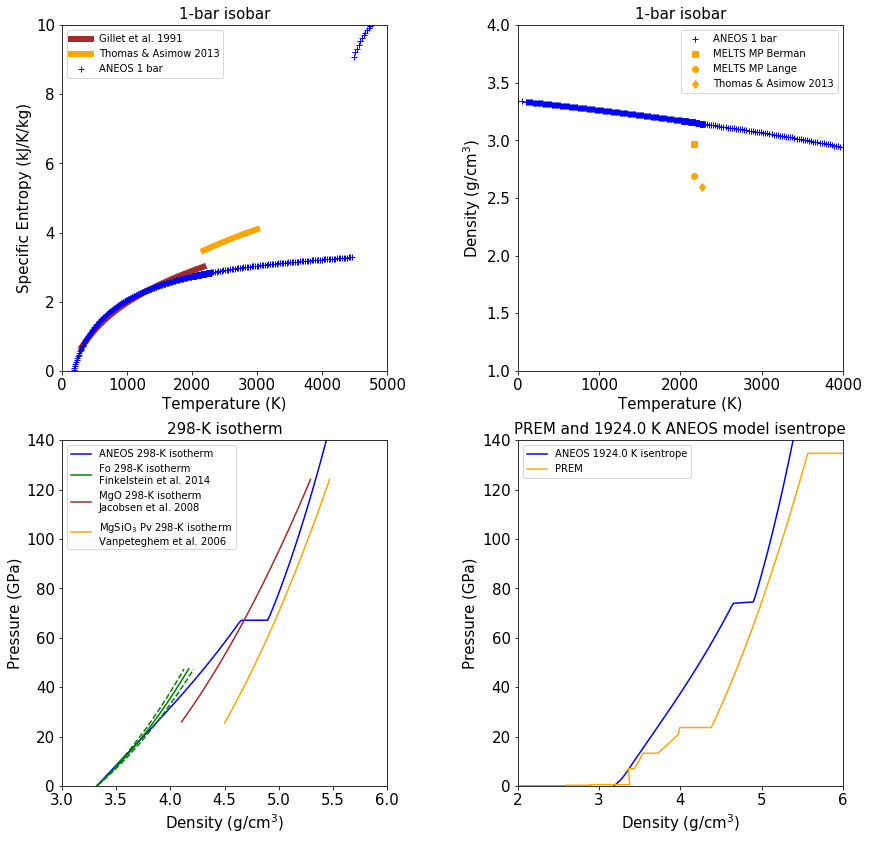

In [15]:
# 1-bar plots and 298 K plots

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)

#--------
# temperature - entropy at 1 bar
ai=0
aj=0


axes[ai,aj].plot(Gilletdatarr.iloc[:,0].values,Gilletdatarr.iloc[:,1].values/1.e3,linestyle='-',color='brown',linewidth=6,label='Gillet et al. 1991')
axes[ai,aj].plot(Gilletdatarr.iloc[:,2].values,Gilletdatarr.iloc[:,3].values/1.e3,linestyle='-',color='orange',linewidth=6,label='Thomas & Asimow 2013')
axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.S*1.E3,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(0,5000)


#----
# density-temperature at 1 bar
ai=0
aj=1

axes[ai,aj].plot(NewEOS.onebar.T,NewEOS.onebar.rho,'+',color='blue',label='ANEOS 1 bar')

axes[ai,aj].set_ylabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_xlabel('Temperature (K)',size=sfont)
axes[ai,aj].set_title('1-bar isobar',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_ylim(1,4)
axes[ai,aj].set_xlim(0,4000)

# plot data
axes[ai,aj].plot(1890+273.,2.968,'s',color='orange',label='MELTS MP Berman')
axes[ai,aj].plot(1890+273.,2.687,'o',color='orange',label='MELTS MP Lange')
axes[ai,aj].plot(2273.,2.597,'d',color='orange',label='Thomas & Asimow 2013')


#----
# density-pressure at 298 K
ai=1
aj=0

iT0REF = np.where(NewEOS.T == T0REF)[0]
axes[ai,aj].plot(NewEOS.rho,NewEOS.P[iT0REF[0],:],'-',color='blue',label='ANEOS 298-K isotherm')

# Finkelstein et al. 2014 Forsterite isotherm
K0T = 130.0 # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/NewEOS.R0REF,7./3.)-np.power(NewEOS.rho/NewEOS.R0REF,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/NewEOS.R0REF,2./3.)-1.))
K0T = 130.0-9. # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure_low = 1.5*K0T*(np.power(NewEOS.rho/NewEOS.R0REF,7./3.)-np.power(NewEOS.rho/NewEOS.R0REF,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/NewEOS.R0REF,2./3.)-1.))
K0T = 130.0+9. # +-9 GPa
K0Tp = 4.12 # +- 0.07
BM_pressure_high = 1.5*K0T*(np.power(NewEOS.rho/NewEOS.R0REF,7./3.)-np.power(NewEOS.rho/NewEOS.R0REF,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/NewEOS.R0REF,2./3.)-1.))
igood = np.where(BM_pressure < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='green',label='Fo 298-K isotherm\nFinkelstein et al. 2014')
igood = np.where(BM_pressure_low < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure_low[igood],'--',color='green')
igood = np.where(BM_pressure_high < 48.)
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure_high[igood],'--',color='green')


# Jacobsen et al. 2008 MgO isotherm
K0T = 159.6 # +-0.6 GPa room temp isotherm
K0Tp = 3.74 # +-0.03 
R00 = (24.305+15.999)*4.*1.6726/(74.697*1.E-3)/1.E3 # kg/m3->g/cm3 
#print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 25.)&(BM_pressure < 125.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='brown',label='MgO 298-K isotherm\nJacobsen et al. 2008')

# Vanpeteghem et al. 2006 silicate perovskite isotherm
K0T = 253. # +-1 GPa room temp isotherm
K0Tp = 4.0 
R00 = (24.305+28.085+3.*15.999)*4.*1.6726/(162.51*1.E-3)/1.E3 # kg/m3->g/cm3 
#print(R00)
BM_pressure = 1.5*K0T*(np.power(NewEOS.rho/R00,7./3.)-np.power(NewEOS.rho/R00,5./3.)
                      )*(1.+0.75*(K0Tp-4.)*(np.power(NewEOS.rho/R00,2./3.)-1.))
igood = np.where((BM_pressure > 25.)&(BM_pressure < 125.))
axes[ai,aj].plot(NewEOS.rho[igood],BM_pressure[igood],'-',color='orange',label='MgSiO$_3$ Pv 298-K isotherm\nVanpeteghem et al. 2006')


axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('298-K isotherm',size=sfont)
axes[ai,aj].set_xlim(3,6)
axes[ai,aj].set_ylim(0,140)

#----
# density-pressure at 298 K
ai=1
aj=1

axes[ai,aj].plot(mantle.density,mantle.pressure,'-',color='blue',label='ANEOS '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K isentrope',markersize=10)
axes[ai,aj].plot(PREM.density/1.E3,PREM.pressure,'-',color='orange',label='PREM')

axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)
axes[ai,aj].set_title('PREM and '+str(np.round(np.interp(1.E-4,mantle.pressure,mantle.temperature)))+' K ANEOS model isentrope',size=sfont)
axes[ai,aj].set_xlim(2,6)
axes[ai,aj].set_ylim(0,140)

# don't show a plot in lower right
#axes[1,1].axis("off")


axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)



## ANEOS Gruneisen parameter and Theta parameter for thermal model

The Gruneisen parameter in forsterite liquid has been determined experimentally from shock wave data (Thomas & Asimow 2013; Davies et al. in prep.). Shockwave data derive the Grueneisen parameter in reference to a known state:
\begin{equation}
\gamma = \frac{1}{\rho}\frac{(P-P_{\rm ref})}{(E-E_{\rm ref})} \bigg\rvert _V
\end{equation}

The ANEOS Gruneisen model is split into two parts. For $\rho \ge \rho_{0}$,
\begin{equation}
\gamma = \left( \frac{\gamma_0 \rho_0}{\rho}  + C_{24} \left( 1-\frac{\rho_0}{\rho} \right)^2 \right) (1-C_{60}) + \left( \gamma_0 + (C_{24}-\gamma_0) \left( 1- \frac{\rho_0}{\rho} \right)^2 \right) C_{60}.
\end{equation}
For $\rho < \rho_{0}$,
\begin{equation}
\gamma = C_{16} \rho^2 + C_{17}\rho + 1 + C_{61}.
\end{equation}

$C_{16}$ and $C_{17}$ are calculated so that $\gamma$ and $d \gamma / d \rho$ are continuous at $\rho=\rho_0$. The model asymptotes to the Thomas-Fermi limit ($\gamma=2/3$) when $C_{24}=2/3$.

The functional form in ANEOS does not provide a good fit to the data on forsterite. As a result, the model Gruneisen parameter does not extrapolate to the Thomas-Fermi limit at high pressures. 

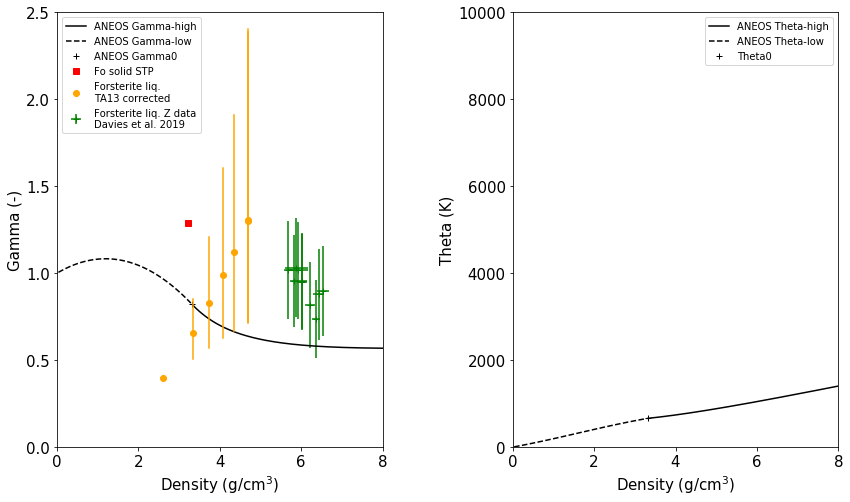

In [16]:
# plot the gamma and isotherms

# ANEOS Formulation for Gamma and theta
theta0=abs(NewEOS.theta0)
rhoarr = (1+np.arange(1000))/1000.*NewEOS.R0REF*10.
gammaarr = (NewEOS.gamma0*NewEOS.R0REF/rhoarr
           )+NewEOS.C24*np.power(1.0-NewEOS.R0REF/rhoarr,2.)*(1.-NewEOS.C60)+(NewEOS.gamma0 + (NewEOS.C24-NewEOS.gamma0)*np.power(1.-NewEOS.R0REF/rhoarr,2.))*NewEOS.C60
s3 = NewEOS.C61+1.
C14 = theta0 * np.exp(1.5*s3-(2.-0.5*NewEOS.C60)*NewEOS.gamma0)/(np.power(NewEOS.R0REF,s3))
C16 = (s3-(2.-NewEOS.C60)*NewEOS.gamma0)/(NewEOS.R0REF*NewEOS.R0REF)
C17 = ((3.-NewEOS.C60)*NewEOS.gamma0-2.*s3)/NewEOS.R0REF
gammaarrlow = C16*rhoarr*rhoarr+C17*rhoarr+s3
thetaarr = theta0*np.exp((1.-NewEOS.C60)*(1.-NewEOS.R0REF/rhoarr)*NewEOS.gamma0-0.5*(NewEOS.R0REF/rhoarr)*(3.-(NewEOS.R0REF/rhoarr)*(4-(NewEOS.R0REF/rhoarr))))*np.power((rhoarr/NewEOS.R0REF),NewEOS.C24)
thetalowarr = C14*np.exp(rhoarr*(C17+0.5*C16*rhoarr))*np.power(rhoarr,s3)


#-------- plots
sfont = 15
fig, axes = plt.subplots(1, 2, figsize=(14,8))
plt.subplots_adjust(wspace=0.4)


# -----
ai=0
indlow = np.where(rhoarr <= NewEOS.R0REF)
indhigh = np.where(rhoarr >= NewEOS.R0REF)
axes[ai].plot(rhoarr[indhigh[0]],gammaarr[indhigh[0]],label="ANEOS Gamma-high",color='black')
axes[ai].plot(rhoarr[indlow[0]], gammaarrlow[indlow[0]],label="ANEOS Gamma-low",color='black',ls='--')

axes[ai].plot(NewEOS.R0REF,NewEOS.gamma0,'+',label="ANEOS Gamma0",color='black')

axes[ai].set_ylim(0,2.5)
axes[ai].set_xlim(0,8)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Gamma (-)',size=sfont)
axes[ai].tick_params(labelsize=sfont)

# solid forsterite at STP
axes[ai].plot([3.22],[1.29],'s',color='red',label='Fo solid STP')

# Thomas and Asimow 2013 liquid forsterite shock data
gamma_0=0.396
q=-2.02
q_u=1.03
Rho_0=2597. # kg/m^3
asi_rhot = np.array([3739.79122056, 3335.90237636,4691.02371542 ,4088.40354767, 4347.15217391 ,4681.1865942 ])
##asi_rhot=np.array([3340.0, 3740.0, 4100.0, 4680.0, 5290.0, 5420.0]) # BAD TABULATED VALUES in TA13
asi_gammat=gamma_0*np.power(Rho_0/asi_rhot,q)

asi_rho = np.append([2597.],asi_rhot)/1.e3
asi_gamma = np.append([0.396],asi_gammat)

#print(asi_rho)
#print(asi_gamma)
#[3739.79122056 3335.90237636 4691.02371542 4088.40354767 4347.15217391 4681.1865942 ]
#[0.82720568 0.65667847 1.30744208 0.99037675 1.12107749 1.30190973]

# Erik's error bars monte carlo'd for the asimow data
#gamma [ 0.82271901  0.65485213  1.29584059  0.97276836  1.11171104  1.29195917]
asi_gamma_sig_low=np.asarray([0., 0.25715384 , 0.14948592 , 0.5898531,   0.36154228 , 0.45607297 , 0.58790934])
asi_gamma_sig_high=np.asarray([0., 0.37855329,  0.19525818 , 1.09577441,  0.6137275 ,  0.78965792 , 1.08676142])

axes[ai].plot(asi_rho,asi_gamma,'o',color='orange',label='Forsterite liq.\nTA13 corrected')
for i in range(0,len(asi_gamma)):
    axes[ai].plot([asi_rho[i],asi_rho[i]],[asi_gamma[i]-asi_gamma_sig_low[i],asi_gamma[i]+asi_gamma_sig_high[i]],linestyle='-',color='orange')

# these values from the submitted paper
axes[ai].errorbar(SR_rho,SR_gamma,yerr=SR_gamma_e, xerr=SR_rho_e, fmt='g+', label ='Forsterite liq. Z data\nDavies et al. 2019')


# -----
ai=1
axes[ai].plot(rhoarr[indhigh[0]],thetaarr[indhigh[0]],label="ANEOS Theta-high",color='black')
axes[ai].plot(rhoarr[indlow[0]],thetalowarr[indlow[0]],label="ANEOS Theta-low",color='black',ls='--')
axes[ai].plot(NewEOS.R0REF,theta0,'+',label="Theta0",color='black')

axes[ai].set_ylim(0,10000)
axes[ai].set_xlim(0,8)

axes[ai].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai].set_ylabel('Theta (K)',size=sfont)
axes[ai].tick_params(labelsize=sfont)


axes[0].legend(fontsize=sfont-5)
axes[1].legend(fontsize=sfont-5)



# Specfic Heat Capacity and Sounds Speeds

The calculated heat capacities on the forsterite Hugoniot in the liquid region, from Root et al. 2018, are similar to the 1-bar value derived from Thomas and Asimow 2013. Both are larger than the 3nR high temperature value for the solid (Gillet et al. 1991).

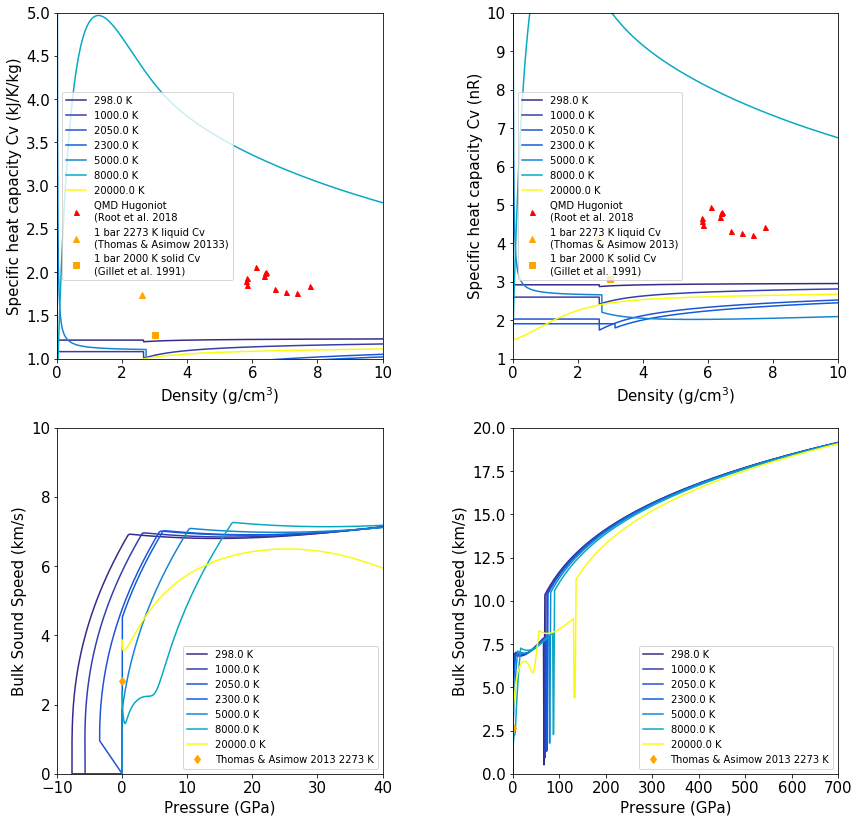

In [17]:

sfont = 15
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)


#-----------------------------
# Pick isotherms and set color scale
ixtemparr = [298.,1000.,2050.,2300.,5000.,8000.,20000.]
# set color scale same for all plots
tcolmin=0.
tcolmax=20000.

# find the index closest to the selected temperatures -- no interpolation
ixindarr=np.zeros(len(ixtemparr))
ixlabelarr = []
for i in np.arange(len(ixtemparr)):
    tmpi=int(np.round(np.interp(ixtemparr[i],NewEOS.T,np.arange(NewEOS.NT))))
    #print(tmpi,antarr[tmpi])
    ixindarr[i] = tmpi
    ixlabelarr.append(str(ixtemparr[i])+' K')


#-----------------------
ai=0
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(QMDH_r1,QMDH_cv*1000.,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
axes[ai,aj].plot(2.597,1.73736,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 20133)')
axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/1.E3,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,5.)
axes[ai,aj].set_xlim(0,10)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (kJ/K/kg)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
ai=0
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.cv[int(ixindarr[i]),:]*1000.*1000./7/8.314*0.14,c=col,linestyle='-',label=ixlabelarr[i])


axes[ai,aj].plot(QMDH_r1,QMDH_cv*1.E6/7/8.314*0.14,styleqmd[0],markersize=styleqmd[2],color=styleqmd[1],label='QMD Hugoniot\n(Root et al. 2018')
axes[ai,aj].plot(2.597,1737./7/8.314*0.140,'^',color='orange',label='1 bar 2273 K liquid Cv\n(Thomas & Asimow 2013)')
axes[ai,aj].plot(3.,180./(NewEOS.FMW/1.E3)/7/8.314*0.140,'s',color='orange',label='1 bar 2000 K solid Cv\n(Gillet et al. 1991)')
axes[ai,aj].set_ylim(1.,10.)
axes[ai,aj].set_xlim(0,10)

axes[ai,aj].set_ylabel('Specific heat capacity Cv (nR)',size=sfont)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-----------------------
# plot sound speed along isotherms
ai=1
aj=0
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(1.e-4,2.674,'d',color='orange',label='Thomas & Asimow 2013 2273 K')

axes[ai,aj].set_ylim(0,10)
axes[ai,aj].set_xlim(-10,40)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-----------------------
# plot sound speed along isotherms
ai=1
aj=1
for i in np.arange(len(ixtemparr)):
    icolscale = (ixtemparr[i]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.P[int(ixindarr[i]),:],NewEOS.cs[int(ixindarr[i]),:]/1.e5,c=col,linestyle='-',label=ixlabelarr[i])

axes[ai,aj].plot(1.e-4,2.674,'d',color='orange',label='Thomas & Asimow 2013 2273 K')

axes[ai,aj].set_ylim(0,20)
axes[ai,aj].set_xlim(0,700)

axes[ai,aj].set_ylabel('Bulk Sound Speed (km/s)',size=sfont)
axes[ai,aj].set_xlabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)


## Check the grid spacing compared to the phase boundaries

Colors correspond to temperature. Black lines are ANEOS phase boundaries.


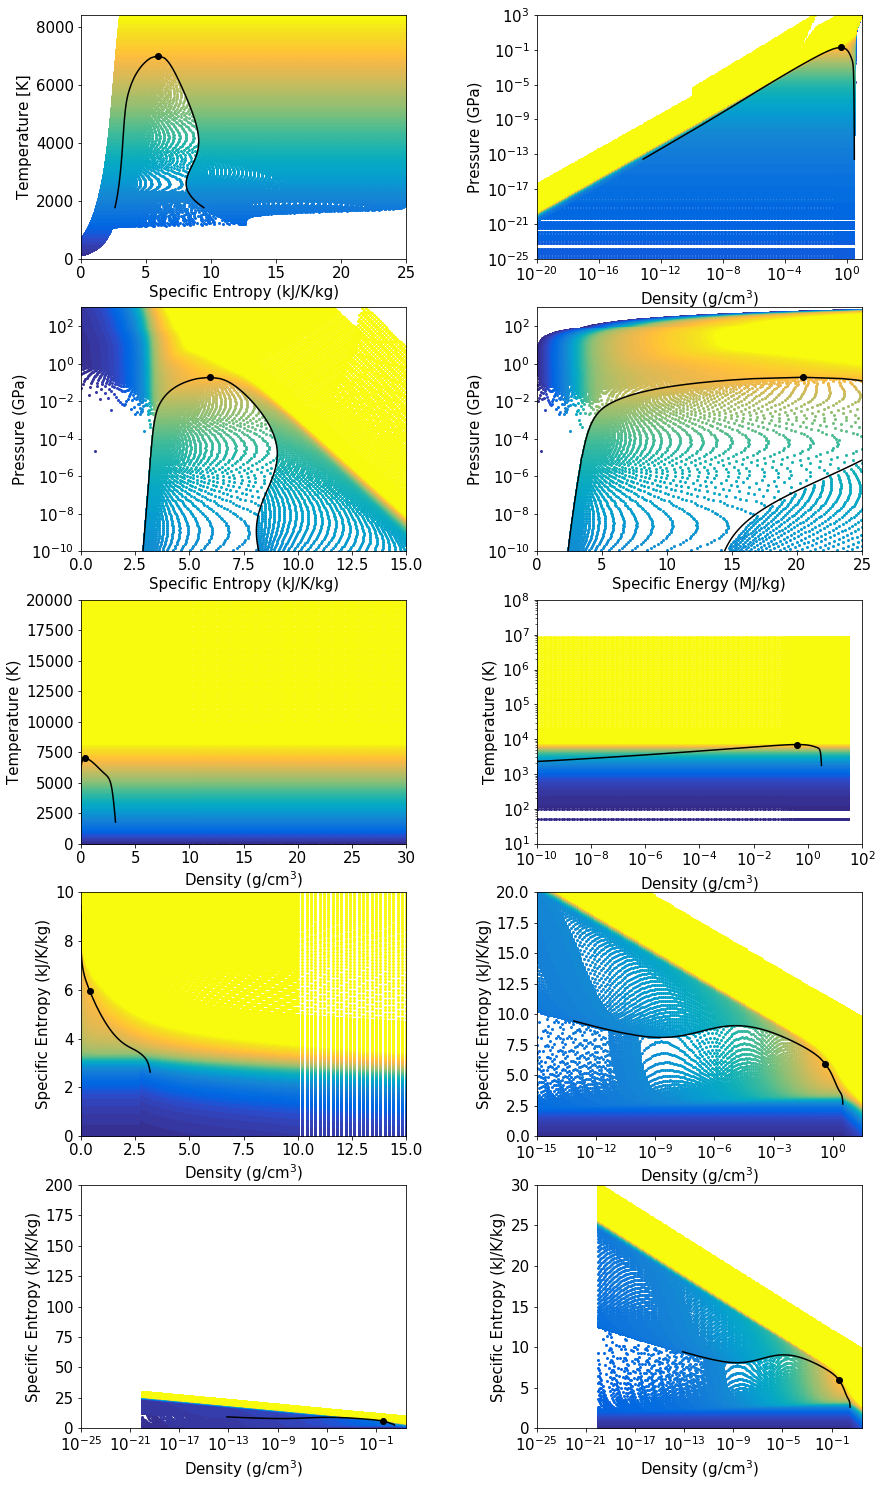

In [18]:
# check the gridding of the table around the vapor curve

# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.4)
tcolmin=0.
tcolmax=1.2*NewEOS.cp.T
tpltmax=1.2*NewEOS.cp.T

tskip=1
#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Temperature [K]',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

axes[ai,aj].set_ylim(0,tpltmax)
axes[ai,aj].set_xlim(0,25)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.Sl*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.T,color="black")


#-------------
ai=0
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-25,1000)
axes[ai,aj].set_xlim(1.e-20,10.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.E3,NewEOS.P[it,:],'o',markersize=2,color=col)
axes[ai,aj].semilogy(NewEOS.vc.Sl*1.e3,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Sv*1.e3,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.S*1.e3,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,15)
axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=1
aj=1


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.Ul,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.Uv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.U,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-10,1000)
axes[ai,aj].set_xlim(0,25)
axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)



#-------------
ai=2
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)
axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=2
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].loglog(NewEOS.rho,np.zeros(NewEOS.ND)+NewEOS.T[it],'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-10,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=0

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")


axes[ai,aj].set_ylim(0.,10)
axes[ai,aj].set_xlim(0.,15.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=3
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,20)
axes[ai,aj].set_xlim(1.E-15,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)




#-------------
ai=4
aj=1

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,30)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=0

tcolmax=40000.
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].semilogx(NewEOS.rho,NewEOS.S[it,:]*1000.,'o',markersize=2,color=col)

axes[ai,aj].semilogx(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.S*1.E3,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black")

axes[ai,aj].set_ylim(0.,200)
axes[ai,aj].set_xlim(1.E-25,30.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#axes[0,0].legend(fontsize=sfont-5)
#axes[0,1].legend(fontsize=sfont-5)
#axes[1,0].legend(fontsize=sfont-5)
#axes[1,1].legend(fontsize=sfont-5)



# ANEOS KPA FLAG

                                TABLE          ANEOS
     KPAQQ=STATE INDICATOR      =1, 1p    =1, 1p    (eos without melt)
                                =2, 2p lv =2, 2p liquid/solid plus vapor
                                          =4, 1p solid  (eos with melt)
                                          =5, 2p melt   (eos with melt)
                                          =6, 1p liquid (eos with melt)
                                =-1 bad value of temperature
                                =-2 bad value of density
                                =-3 bad value of material number

To resolve a melt curve, there should be sufficient numbers of points within the melt curve (KPA=5, red points) so that the melt curve is continuously sampled in the grid.

The pink region is where the vapor pressure is bottomed out at 1.E-30 GPa or the pressures are negative (if there is a tension region.)

Every 10th isotherm in the table is plotted.

Unique values in the KPA flag array: [1. 2.]
Value: # elements with this value
1.0 :  528995
2.0 :  110845


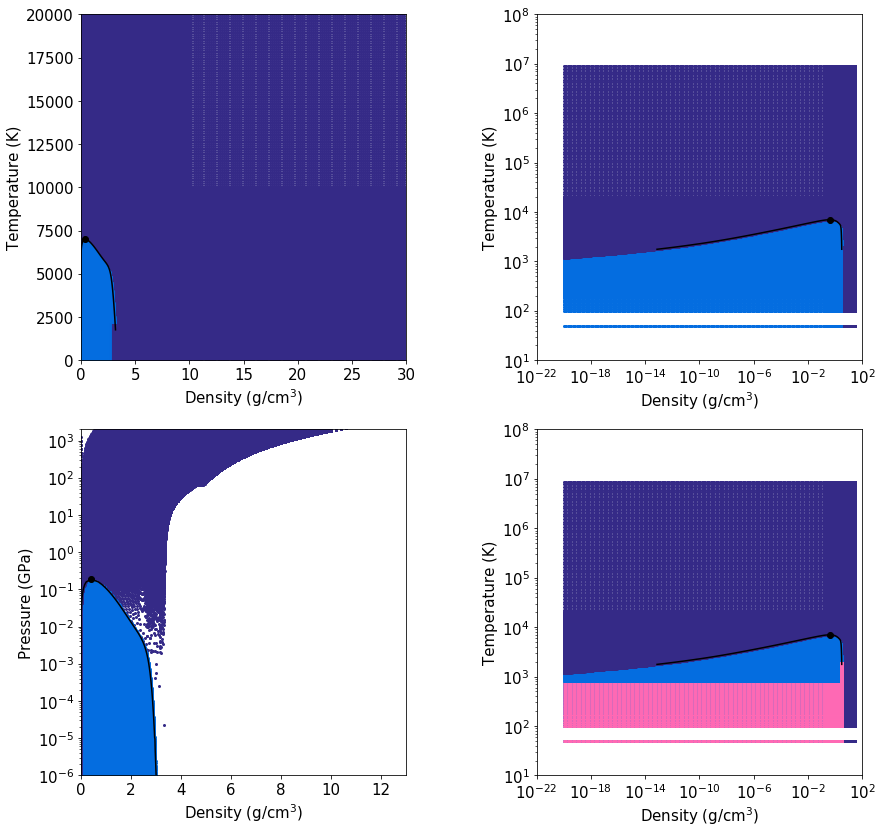

In [19]:
# check the ANEOS quality flag for errors in the EOS surface
uniqkarr = np.unique(NewEOS.KPA)
print("Unique values in the KPA flag array:", uniqkarr)
print("Value: # elements with this value")
#get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

for i in uniqkarr:
    ix = get_indexes(i,np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT))
    print(i,': ',len(ix))


    
# Plot aneos vapor curves
sfont = 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
plt.subplots_adjust(wspace=0.4)
kcolmin=1
kcolmax=7

tskip=1
#-------------


#-------------
ai=0
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].plot(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")


axes[ai,aj].set_ylim(0.,20000)
axes[ai,aj].set_xlim(0,30.)


#-------------
ai=0
aj=1

for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].loglog(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")

axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].semilogy(NewEOS.rho[ix],NewEOS.P[itt,ix],'o',markersize=2,color=col)

axes[ai,aj].semilogy(NewEOS.vc.rl,NewEOS.vc.Pl,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.Pv,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.P,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(1.e-6,2000)
axes[ai,aj].set_xlim(0,13.)


#-------------
ai=1
aj=1
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Temperature (K)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for itt in range(1,NewEOS.NT,tskip):
    for i in uniqkarr:
        ix = get_indexes(i,NewEOS.KPA[itt,:])
        icolscale = (i-kcolmin)/(kcolmax-kcolmin)
        col=local_cmaps.parula(icolscale)
        if i == 5:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=5,color='red')
#            print(i,andarr[ix],antarr[itt])
        else:
            axes[ai,aj].plot(NewEOS.rho[ix],np.full(len(ix),NewEOS.T[itt]),'o',markersize=2,color=col)
    tmp = np.where(NewEOS.P[itt,:] < 0.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='purple')
    tmp = np.where(NewEOS.P[itt,:]*1.e30 <= 2.)
    if (len(tmp[0]) > 0):
        axes[ai,aj].plot(NewEOS.rho[tmp[0]],np.full(len(tmp[0]),NewEOS.T[itt]),'o',markersize=2,color='hotpink')

axes[ai,aj].loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.vc.rv,NewEOS.vc.T,color="black")
axes[ai,aj].plot(NewEOS.cp.rho,NewEOS.cp.T,'o',color="black")
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.T,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.T,color="black")
    
axes[ai,aj].set_ylim(10.,1.E8)
axes[ai,aj].set_xlim(1.E-22,100.)
fig.show()

# Check the Melt Curve in Tabulated EOS

Colored lines correspond to isotherms. Black lines are ANEOS phase boundaries.

Tabulations of the equation of state can lead to erroneous material descriptions across the melt curve. In the following plots, the isotherms should be flat (constant pressure) across the phase boundary (black lines). Every 10th isotherm in the table is shown in the plotted regions.

The use of the high-pressure phase feature in ANEOS leads to an artificial first order phase transition in the liquid field.

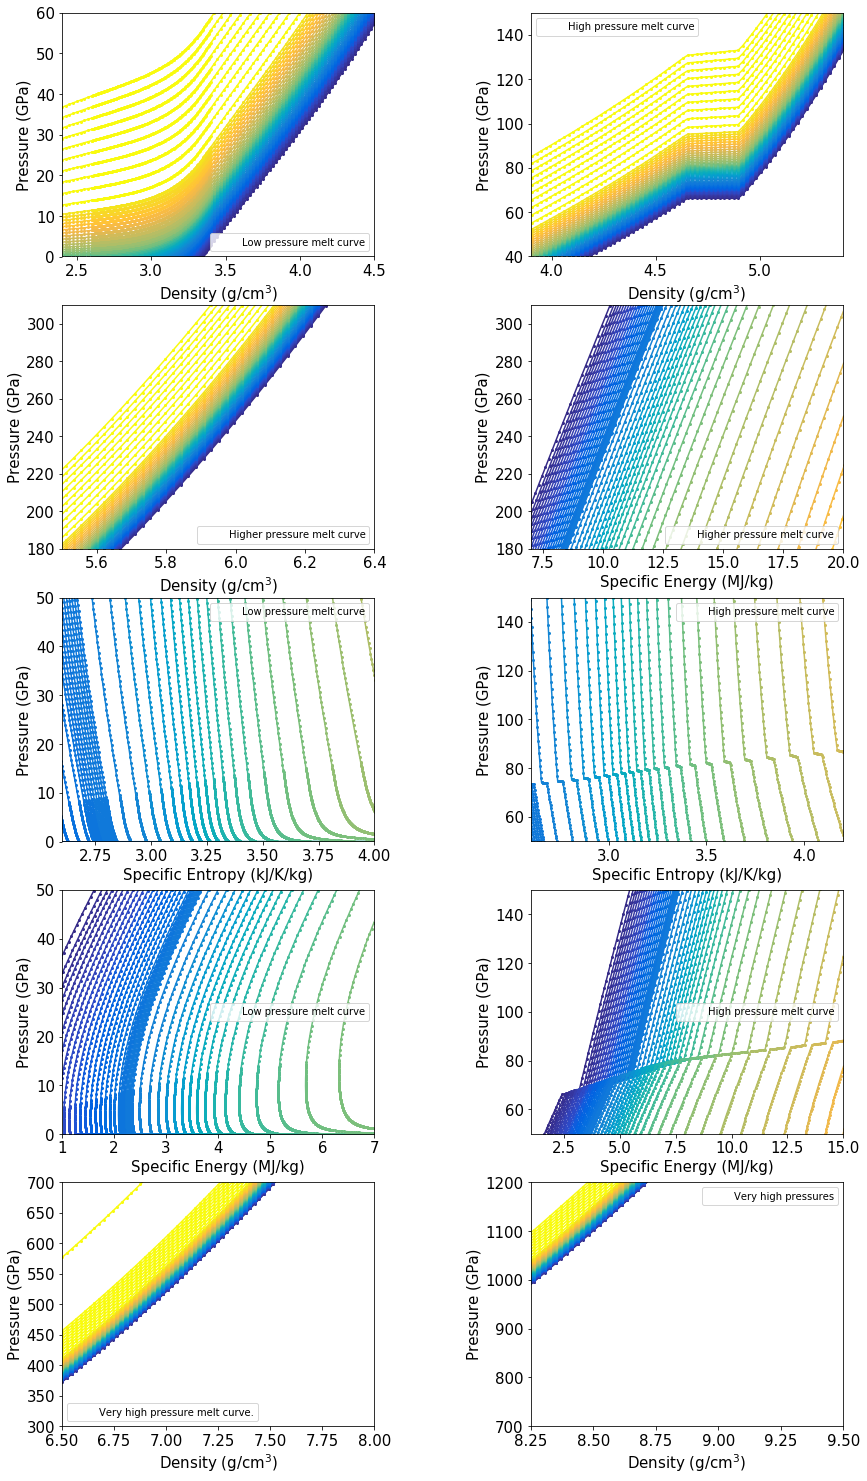

In [20]:
# CHECK MELT CURVE GRIDDING
sfont = 15
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,26))
plt.subplots_adjust(wspace=0.5)
tcolmin=0.
tcolmax=1.5*NewEOS.cp.T
tpltmax=1.5*NewEOS.cp.T

tskip=10
#-------------
ai=0
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(.1,60)
axes[ai,aj].set_xlim(2.4,4.5)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=0
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(40.,150)
axes[ai,aj].set_xlim(3.9,5.4)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=0
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")


axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(5.5,6.4)
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


#-------------
ai=1
aj=1
axes[ai,aj].plot([],[],' ',label='Higher pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(180.,310)
axes[ai,aj].set_xlim(7,20)

#-------------

ai=2
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(.1,50)
axes[ai,aj].set_xlim(2.6,4.)


#-------------

ai=2
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Entropy (kJ/K/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.S[it,:]*1.e3,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Sl*1.e3,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Ss*1.e3,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(2.6,4.2)


#-------------
ai=3
aj=0
axes[ai,aj].plot([],[],' ',label='Low pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_xlim(1,7)
axes[ai,aj].set_ylim(.1,50)

#-------------
ai=3
aj=1
axes[ai,aj].plot([],[],' ',label='High pressure melt curve')

axes[ai,aj].set_xlabel('Specific Energy (MJ/kg)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)


for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.U[it,:],NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.Ul,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.Us,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(50.,150)
axes[ai,aj].set_xlim(1,15)



#-------------
ai=4
aj=0
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,color=col,linestyle='-')

if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")

axes[ai,aj].set_ylim(300,700)
axes[ai,aj].set_xlim(6.5,8.)

axes[ai,aj].plot([],[],' ',label='Very high pressure melt curve.')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#-------------
ai=4
aj=1
for it in range(1,NewEOS.NT,tskip):
    icolscale = (NewEOS.T[it]-tcolmin)/(tcolmax-tcolmin)
    col=local_cmaps.parula(icolscale)
    axes[ai,aj].plot(NewEOS.rho,NewEOS.P[it,:],'o',markersize=2,linestyle='-',color=col)
if NewEOS.tp.T > 0:
    axes[ai,aj].plot(NewEOS.mc.rl,NewEOS.mc.Pl,color="black")
    axes[ai,aj].plot(NewEOS.mc.rs,NewEOS.mc.Ps,color="black")
axes[ai,aj].set_ylim(700,1200)
axes[ai,aj].set_xlim(8.25,9.5)

axes[ai,aj].plot([],[],' ',label='Very high pressures')
axes[ai,aj].set_xlabel('Density (g/cm$^3$)',size=sfont)
axes[ai,aj].set_ylabel('Pressure (GPa)',size=sfont)
axes[ai,aj].tick_params(labelsize=sfont)

#------
axes[0,0].legend(fontsize=sfont-5)
axes[0,1].legend(fontsize=sfont-5)
axes[1,0].legend(fontsize=sfont-5)
axes[1,1].legend(fontsize=sfont-5)
axes[2,0].legend(fontsize=sfont-5)
axes[2,1].legend(fontsize=sfont-5)
axes[3,0].legend(fontsize=sfont-5)
axes[3,1].legend(fontsize=sfont-5)
axes[4,0].legend(fontsize=sfont-5)
axes[4,1].legend(fontsize=sfont-5)



# PLOT GADGET2 FORMAT TABLE: Entropy-Density grid

## Color contour plots of the GADGET Rho-S table

The SESAME table and GADGET table use the same density array. So the GADGET table is linearly interpolated along a density-column to find the new table values at each point in the GADGET entropy grid. 

Errors in the interpolation, particularly near phase boundaries, can be seen in the sound speeds and KPA flags.


In [21]:
if MAKEGADGETTABLE == 1:
    # PLOT COLOR SHADED VALUES RHO-S TABLE
    lw=1
    sfont = 15
    ds = (10,10)

    fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,22))
    plt.subplots_adjust(wspace=0.4)

    ##================ Pressure
    im1=ax0.pcolormesh(GadEOS.rho,GadEOS.S*1.e3,(np.log10(GadEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax0.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.e3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.e3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.e3,'ko')
    if NewEOS.mc.NT > 0:
        ax0.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax0.set_ylim(0.,15)
    ax0.set_xlim(0,30.)
    ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax0.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
    ax0.tick_params(labelsize=sfont)

    divider0 = make_axes_locatable(ax0)
    cax0 = divider0.append_axes('right', size='5%', pad=0.05)
    cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
    #cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
    cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
    #cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

    im1=ax1.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax1.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax1.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax1.set_ylim(0.1,300)
    ax1.set_xlim(1.E-21,100.)
    ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax1.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
    ax1.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)



    #================ Sp. Int. Energy
    im1=ax2.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax2.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax2.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax2.set_ylim(0.,15)
    ax2.set_xlim(0,30.)
    ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax2.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
    ax2.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    # does not want to label ticks in this location
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)


    ax3.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax3.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax3.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax3.set_ylim(.1,300)
    ax3.set_xlim(1.E-21,100.)
    ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax3.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
    ax3.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

    #================ Temperature
    im1=ax4.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.T)-2)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax4.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax4.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax4.set_ylim(0.,15)
    ax4.set_xlim(0,30.)
    ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax4.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax4.set_title('Colors=log$_{10}$(Temperature (K))',size=sfont)
    ax4.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['2', '4', '6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(T) [K]',size=sfont)


    ax5.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.T)-2)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax5.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax5.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax5.set_ylim(.1,300)
    ax5.set_xlim(1.E-21,100.)
    ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax5.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax5.set_title('Colors=log$_{10}$(Temperature (K))',size=sfont)
    ax5.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['2', '4','6'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(T) [K]',size=sfont)

    plt.show()

    ##============= start new plot
    fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,22))
    plt.subplots_adjust(wspace=0.4)

    #================ Sound Speed
    im1=ax0.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax0.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax0.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax0.set_ylim(0.,15)
    ax0.set_xlim(0,30.)
    ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax0.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
    ax0.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(cs) [cm/s]',size=sfont)


    ax1.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(np.log10(GadEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax1.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax1.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax1.set_ylim(.1,300)
    ax1.set_xlim(1.E-21,100.)
    ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax1.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
    ax1.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(cs) [cm/s]',size=sfont)



    #================ HFE
    amin = np.min(GadEOS.A)
    amin = -1000.
    alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
    #print('amin, log10(amin)',amin,np.log10(-amin))
    #print('alogmax=',alogmax)
    im1=ax2.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(GadEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
    ax2.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax2.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax2.set_ylim(0.,15)
    ax2.set_xlim(0,30.)
    ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax2.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
    ax2.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



    ax3.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,(GadEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
    ax3.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax3.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax3.set_ylim(.1,300)
    ax3.set_xlim(1.E-21,100.)
    ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax3.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
    ax3.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
    #cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
    cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
    cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
    cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



    #================ KPA flag
    cmap2 = cm.get_cmap('plasma', 6)    # 6 discrete colors
    im1=ax4.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,((GadEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
    ax4.plot(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax4.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
        ax4.plot(NewEOS.mc.rs,NewEOS.mc.Ss*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax4.set_ylim(0.,15)
    ax4.set_xlim(0,30.)
    ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax4.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax4.set_title('Colors=KPA flag',size=sfont)
    ax4.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
    #cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
    cbar.set_label('KPA flag',size=sfont)


    ax5.pcolormesh(GadEOS.rho,GadEOS.S*1.E3,((GadEOS.KPA)-0.5)/6.,cmap=cmap2,vmin=0,vmax=1)
    ax5.loglog(NewEOS.vc.rl,NewEOS.vc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rv,NewEOS.vc.Sv*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.Sl[0]*1.E3,'ko')
    if NewEOS.mc.NT > 0:
        ax5.plot(NewEOS.mc.rl,NewEOS.mc.Sl*1.E3,color="black",linewidth=lw,linestyle='--',dashes=ds)
    #    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

    ax5.set_ylim(.1,300)
    ax5.set_xlim(1.E-21,100.)
    ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
    ax5.set_ylabel('Specific Entropy (kJ/K/kg)',size=sfont)
    ax5.set_title('Colors=KPA flag',size=sfont)
    ax5.tick_params(labelsize=sfont)

    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
    cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
    cbar.set_label('KPA flag',size=sfont)

    plt.show()
else:
    print("No GADGET2 TABLE requested.")

No GADGET2 TABLE requested.


# References

Andrault, D., Bolfan-Casanova, N., Bouhifd, M. A., Boujibar, A., Garbarino, G., Manthilake, G., ... & Pesce, G. (2017). Toward a coherent model for the melting behavior of the deep Earth’s mantle. Physics of the Earth and Planetary Interiors, 265, 67-81.

Asimow PD, Ghiorso MS (1998) Algorithmic Modifications Extending MELTS to Calculate Subsolidus Phase Relations. American Mineralogist 83, 1127-1131.

Barr, A. C. (2016). On the origin of Earth's Moon. Journal of Geophysical Research: Planets, 121(9), 1573-1601.

Benz, W., Cameron, A. G. W., & Melosh, H. J. (1989). The origin of the Moon and the single-impact hypothesis III. Icarus, 81(1), 113-131.

Canup, R. M., Barr, A. C., & Crawford, D. A. (2013). Lunar-forming impacts: high-resolution SPH and AMR-CTH simulations. Icarus, 222(1), 200-219.

Centolanzi, F. J., & Chapman, D. R. (1966). Vapor pressure of tektite glass and its bearing on tektite trajectories determined from aerodynamic analysis. Journal of Geophysical Research, 71(6), 1735-1749.

Chase Jr, M. W., Curnutt, J. L., Downey Jr, J. R., McDonald, R. A., Syverud, A. N., & Valenzuela, E. A. (1982). JANAF thermochemical tables, 1982 supplement. Journal of Physical and Chemical Reference Data, 11(3), 695-940.  https://janaf.nist.gov

Costa, G. C., Jacobson, N. S., & Fegley Jr, B. (2017). Vaporization and thermodynamics of forsterite-rich olivine and some implications for silicate atmospheres of hot rocky exoplanets. Icarus, 289, 42-55.

de Koker, N. P., Stixrude, L., & Karki, B. B. (2008). Thermodynamics, structure, dynamics, and freezing of Mg2SiO4 liquid at high pressure. Geochimica et Cosmochimica Acta, 72(5), 1427-1441.

Davies, E.J., Carter, P.J., Root, S., Kraus, R.G., Spaulding, D.K., Stewart, S.T., Jacobsen, S.B. (2019) Silicate Melting and Vaporization during Rocky Planet Formation, J. Geophys. Res. Planets, submitted.

Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.Duffy, T., Madhusudhan, N., & Lee, K. K. M. (2015). 2.07 Mineralogy of Super-Earth Planets. Treatise on Geophysics, Second Edition, Elsevier, Oxford.

Fiquet, G., Auzende, A. L., Siebert, J., Corgne, A., Bureau, H., Ozawa, H., & Garbarino, G. (2010). Melting of peridotite to 140 gigapascals. Science, 329(5998), 1516-1518.

Gillet, P., Richet, P., Guyot, F., & Fiquet, G. (1991). High‐temperature thermodynamic properties of forsterite. Journal of Geophysical Research: Solid Earth, 96(B7), 11805-11816.

Ghiorso, Mark S., and Sack, Richard O. (1995) Chemical Mass Transfer in Magmatic Processes. IV. A Revised and Internally Consistent Thermodynamic Model for the Interpolation and Extrapolation of Liquid-Solid Equilibria in Magmatic Systems at Elevated Temperatures and Pressures. Contributions to Mineralogy and Petrology, 119, 197-212.

Hosono, N., Karato, S. I., Makino, J., & Saitoh, T. R. (2019). Terrestrial magma ocean origin of the Moon. Nature Geoscience, 1, 418-423.

Jacobsen, S.D., Holl, C.M., Adams, K.A., Fischer, R.A., Martin, E.S., Bina, C.R., Lin, J.F., Prakapenka, V.B., Kubo, A. and Dera, P., 2008. Compression of single-crystal magnesium oxide to 118 GPa and a ruby pressure gauge for helium pressure media. American Mineralogist, 93(11-12), pp.1823-1828.

Kraus, R.G., Stewart, S.T., Swift, D.C., Bolme, C.A., Smith, R.F., Hamel, S., Hammel, B.D., Spaulding, D.K., Hicks, D.G., Eggert, J.H. and Collins, G.W. (2012). Shock vaporization of silica and the thermodynamics of planetary impact events. Journal of Geophysical Research: Planets, 117(E9), E09009, doi:10.1029/2012JE004082.

Kumazawa, M., & Anderson, O. L. (1969). Elastic moduli, pressure derivatives, and temperature derivatives of single‐crystal olivine and single‐crystal forsterite. Journal of Geophysical Research, 74(25), 5961-5972.

Luo, S. N., Akins, J. A., Ahrens, T. J., & Asimow, P. D. (2004). Shock‐compressed MgSiO$_3$ glass, enstatite, olivine, and quartz: Optical emission, temperatures, and melting. Journal of Geophysical Research: Solid Earth, 109(B5).

Lyon, S. P., & Johnson, J. D. (1992). SESAME: The LANL equation of state database. Los Alamos National Laboratories Report LAUR-92-3407, Los Alamos, NM.

Marinova, M. M., Aharonson, O., & Asphaug, E. (2011). Geophysical consequences of planetary-scale impacts into a Mars-like planet. Icarus, 211(2), 960-985.

Mosenfelder, J. L., Asimow, P. D., & Ahrens, T. J. (2007). Thermodynamic properties of Mg2SiO4 liquid at ultra‐high pressures from shock measurements to 200 GPa on forsterite and wadsleyite. Journal of Geophysical Research: Solid Earth, 112(B6).

Mysen, B. O., & Kushiro, I. (1988). Condensation, evaporation, melting, and crystallization in the primitive solar nebula; experimental data in the system MgO-SiO$_2$-H$_2$ to 1.0$\times$10^{-9} bar and 1870 degrees C with variable oxygen fugacity. American Mineralogist, 73(1-2), 1-19.

Nagahara, H., Kushiro, I., & Mysen, B. O. (1994). Evaporation of olivine: Low pressure phase relations of the olivine system and its implication for the origin of chondritic components in the solar nebula. Geochimica et cosmochimica acta, 58(8), 1951-1963.

Richet, P., Leclerc, F., & Benoist, L. (1993). Melting of forsterite and spinel, with implications for the glass transition of Mg$_2$SiO$_4$ liquid. Geophysical Research Letters, 20(16), 1675-1678.

Robie, R. A., Hemingway, B. S., & Takei, H. (1982). Heat capacities and entropies of Mg$_2$SiO$_4$, Mn$_2$SiO$_4$, and Co$_2$SiO$_4$ between 5 and 380 K. American Mineralogist, 67(5-6), 470-482.

Root, S., Townsend, J.P., Davies, E., Lemke, R.W., Bliss, D.E., Fratanduono, D.E., Kraus, R.G., Millot, M., Spaulding, D.K., Shulenburger, L. and Stewart, S.T. (2018). The principal Hugoniot of forsterite to 950 GPa. Geophysical Research Letters, 45(9), 3865-3872.

Thomas, C. W., & Asimow, P. D. (2013). Direct shock compression experiments on premolten forsterite and progress toward a consistent high‐pressure equation of state for CaO‐MgO‐Al$_2$O$_3$‐SiO$_2$‐FeO liquids. Journal of Geophysical Research: Solid Earth, 118(11), 5738-5752.

Tillotson, J. H. (1962). Metallic equations of state for hypervelocity impact (No. GA-3216). General Atomics Division, General Dynamics, San Diego, CA.

Vanpeteghem, C. B., Zhao, J., Angel, R. J., Ross, N. L., & Bolfan‐Casanova, N. (2006). Crystal structure and equation of state of MgSiO3 perovskite. Geophysical Research Letters, 33(3), 2005GL024955.

Xiao, B., & Stixrude, L. (2018). Critical vaporization of MgSiO$_3$. Proceedings of the National Academy of Sciences, 115(21), 5371-5376.

Zeman, M., Holec, M., & Váchal, P. (2019). HerEOS: A framework for consistent treatment of the Equation of State in ALE hydrodynamics. Computers & Mathematics with Applications, 78(2), 483-503.

## ANEOS references
Collins, Gareth S., and H. Jay Melosh (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar Planet. Sci. Conf. Abs. 2664.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079-2098.

Thompson, S. L. (1990). ANEOS analytic equations of state for shock physics codes input manual. SANDIA REPORT SAND, 89-2951.

Thompson, S. L., & Lauson, H. S. (1974). Improvements in the Chart D radiation-hydrodynamic CODE III: Revised analytic equations of state (No. SC-RR--71-0714). Sandia Labs.

Stewart, S. T. (2019). ANEOS Code Modification: Thermal model adjustment parameter. https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/


End of File

##### 